# 삼성헬스 러닝 데이터 분석 Project

### 목적
- 다이어트 과정에서 VO2_MAX의 변화값을 확인하고 달리기 데이터를 통해 유산소 능력을 기르기위해 필요한 INSIGHT 를 확인한다.

### VO2_MAX란?
- 최대산소섭취량이라고도 하는 VO2 max는 신체 활동 중 산소를 소비하는 신체의 능력을 측정하는 수치입니다. 심혈관 건강 및 지구력을 나타내는 가장 좋은 지표 중 하나로 간주됩니다.

- 운동 중에 신체 근육이 수축하려면 ATP(아데노신 삼인산) 형태의 에너지가 필요합니다. ATP는 산소가 필요한 세포 호흡이라는 과정을 통해 생성됩니다. 최대산소섭취량은 운동 중에 신체가 소비하고 활용할 수 있는 최대 산소의 양을 말합니다. 최대산소섭취량이 높을수록 신체가 더 많은 산소를 소비할 수 있으며, 이는 신체가 더 많은 ATP를 생성하고 더 오랜 시간 동안 신체 활동을 지속할 수 있다는 것을 의미합니다.

- 최대산소섭취량은 일반적으로 체중 킬로그램당 분당 산소량(ml/min/kg)으로 측정됩니다. 이 측정은 운동 강도를 서서히 높이면서 소비되는 산소와 생성되는 이산화탄소의 양을 측정하는 등급별 운동 테스트를 통해 얻을 수 있습니다.

## 0. 데이터 확인 및 간단한 전처리

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import rc 

plt.rcParams["axes.unicode_minus"] = False 
rc("font", family="Malgun Gothic") 
%matplotlib inline 


In [2]:
df_raw = pd.read_csv('./samsunghealth_821055484341_20230421142606/com.samsung.shealth.exercise.20230421142606_re.csv',sep=',',header=1)

In [3]:
# 'com.samsung.health.exercise.' 문자열을 빈 문자열로 대체하여 컬럼명을 변경합니다.
df_raw.columns = df_raw.columns.str.replace('com.samsung.health.exercise.','')

C:\Users\ysj_1\AppData\Local\Temp\ipykernel_85056\3596565628.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_raw.columns = df_raw.columns.str.replace('com.samsung.health.exercise.','')


In [4]:
df_raw.head().T

0  \
live_data_internal                                     NaN   
mission_value                                          0.0   
subset_data                                            NaN   
routine_datauuid                                       NaN   
total_calorie                                        133.0   
...                                                    ...   
altitude_loss                                          NaN   
exercise_custom_type                                   NaN   
end_time                               2019-10-08 11:30:26   
datauuid              6fb6e7d1-52b6-fae4-4aa2-a30460a52764   
sweat_loss                                             NaN   

                                                         1  \
live_data_internal                                     NaN   
mission_value                                          0.0   
subset_data                                            NaN   
routine_datauuid                                       NaN   
total_calorie                                        81.09   
...                                                    ...   
altitude_loss                                          NaN   
exercise_custom_type                                   NaN   
end_time                               2019-10-10 12:13:46   
datauuid              157dfbc8-b4d8-b5ef-a9a2-10d8fb1adb0e   
sweat_loss                                             NaN   

                                                         2  \
live_data_internal                                     NaN   
mission_value                                          0.0   
subset_data                                            NaN   
routine_datauuid                                       NaN   
total_calorie                                        133.0   
...                                                    ...   
altitude_loss                                          NaN   
exercise_custom_type                                   NaN   
end_time                               2019-10-17 11:29:57   
datauuid              30db45fb-6135-7cd7-e622-d704b0f14c64   
sweat_loss                                             NaN   

                                                         3  \
live_data_internal                                     NaN   
mission_value                                          0.0   
subset_data                                            NaN   
routine_datauuid                                       NaN   
total_calorie                                       560.46   
...                                                    ...   
altitude_loss                                          NaN   
exercise_custom_type                                   NaN   
end_time                                2019-10-09 7:17:55   
datauuid              8aff4932-8d35-140c-1869-2bc960eee8bf   
sweat_loss                                             NaN   

                                                         4  
live_data_internal                                     NaN  
mission_value                                          0.0  
subset_data                                            NaN  
routine_datauuid                                       NaN  
total_calorie                                        86.04  
...                                                    ...  
altitude_loss                                          NaN  
exercise_custom_type                                   NaN  
end_time                               2019-10-22 14:00:20  
datauuid              f63ee732-62f7-a379-a21d-b4c62dfd2221  
sweat_loss                                             NaN  

[64 rows x 5 columns]

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4002 entries, 0 to 4001
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   live_data_internal       2295 non-null   object 
 1   mission_value            1678 non-null   float64
 2   subset_data              2 non-null      object 
 3   routine_datauuid         0 non-null      float64
 4   total_calorie            2683 non-null   float64
 5   completion_status        2993 non-null   float64
 6   pace_info_id             0 non-null      float64
 7   activity_type            0 non-null      float64
 8   pace_live_data           0 non-null      float64
 9   sensing_status           1489 non-null   object 
 10  source_type              4002 non-null   int64  
 11  mission_type             2990 non-null   float64
 12  tracking_status          1671 non-null   float64
 13  program_id               0 non-null      float64
 14  title                   

<AxesSubplot: >

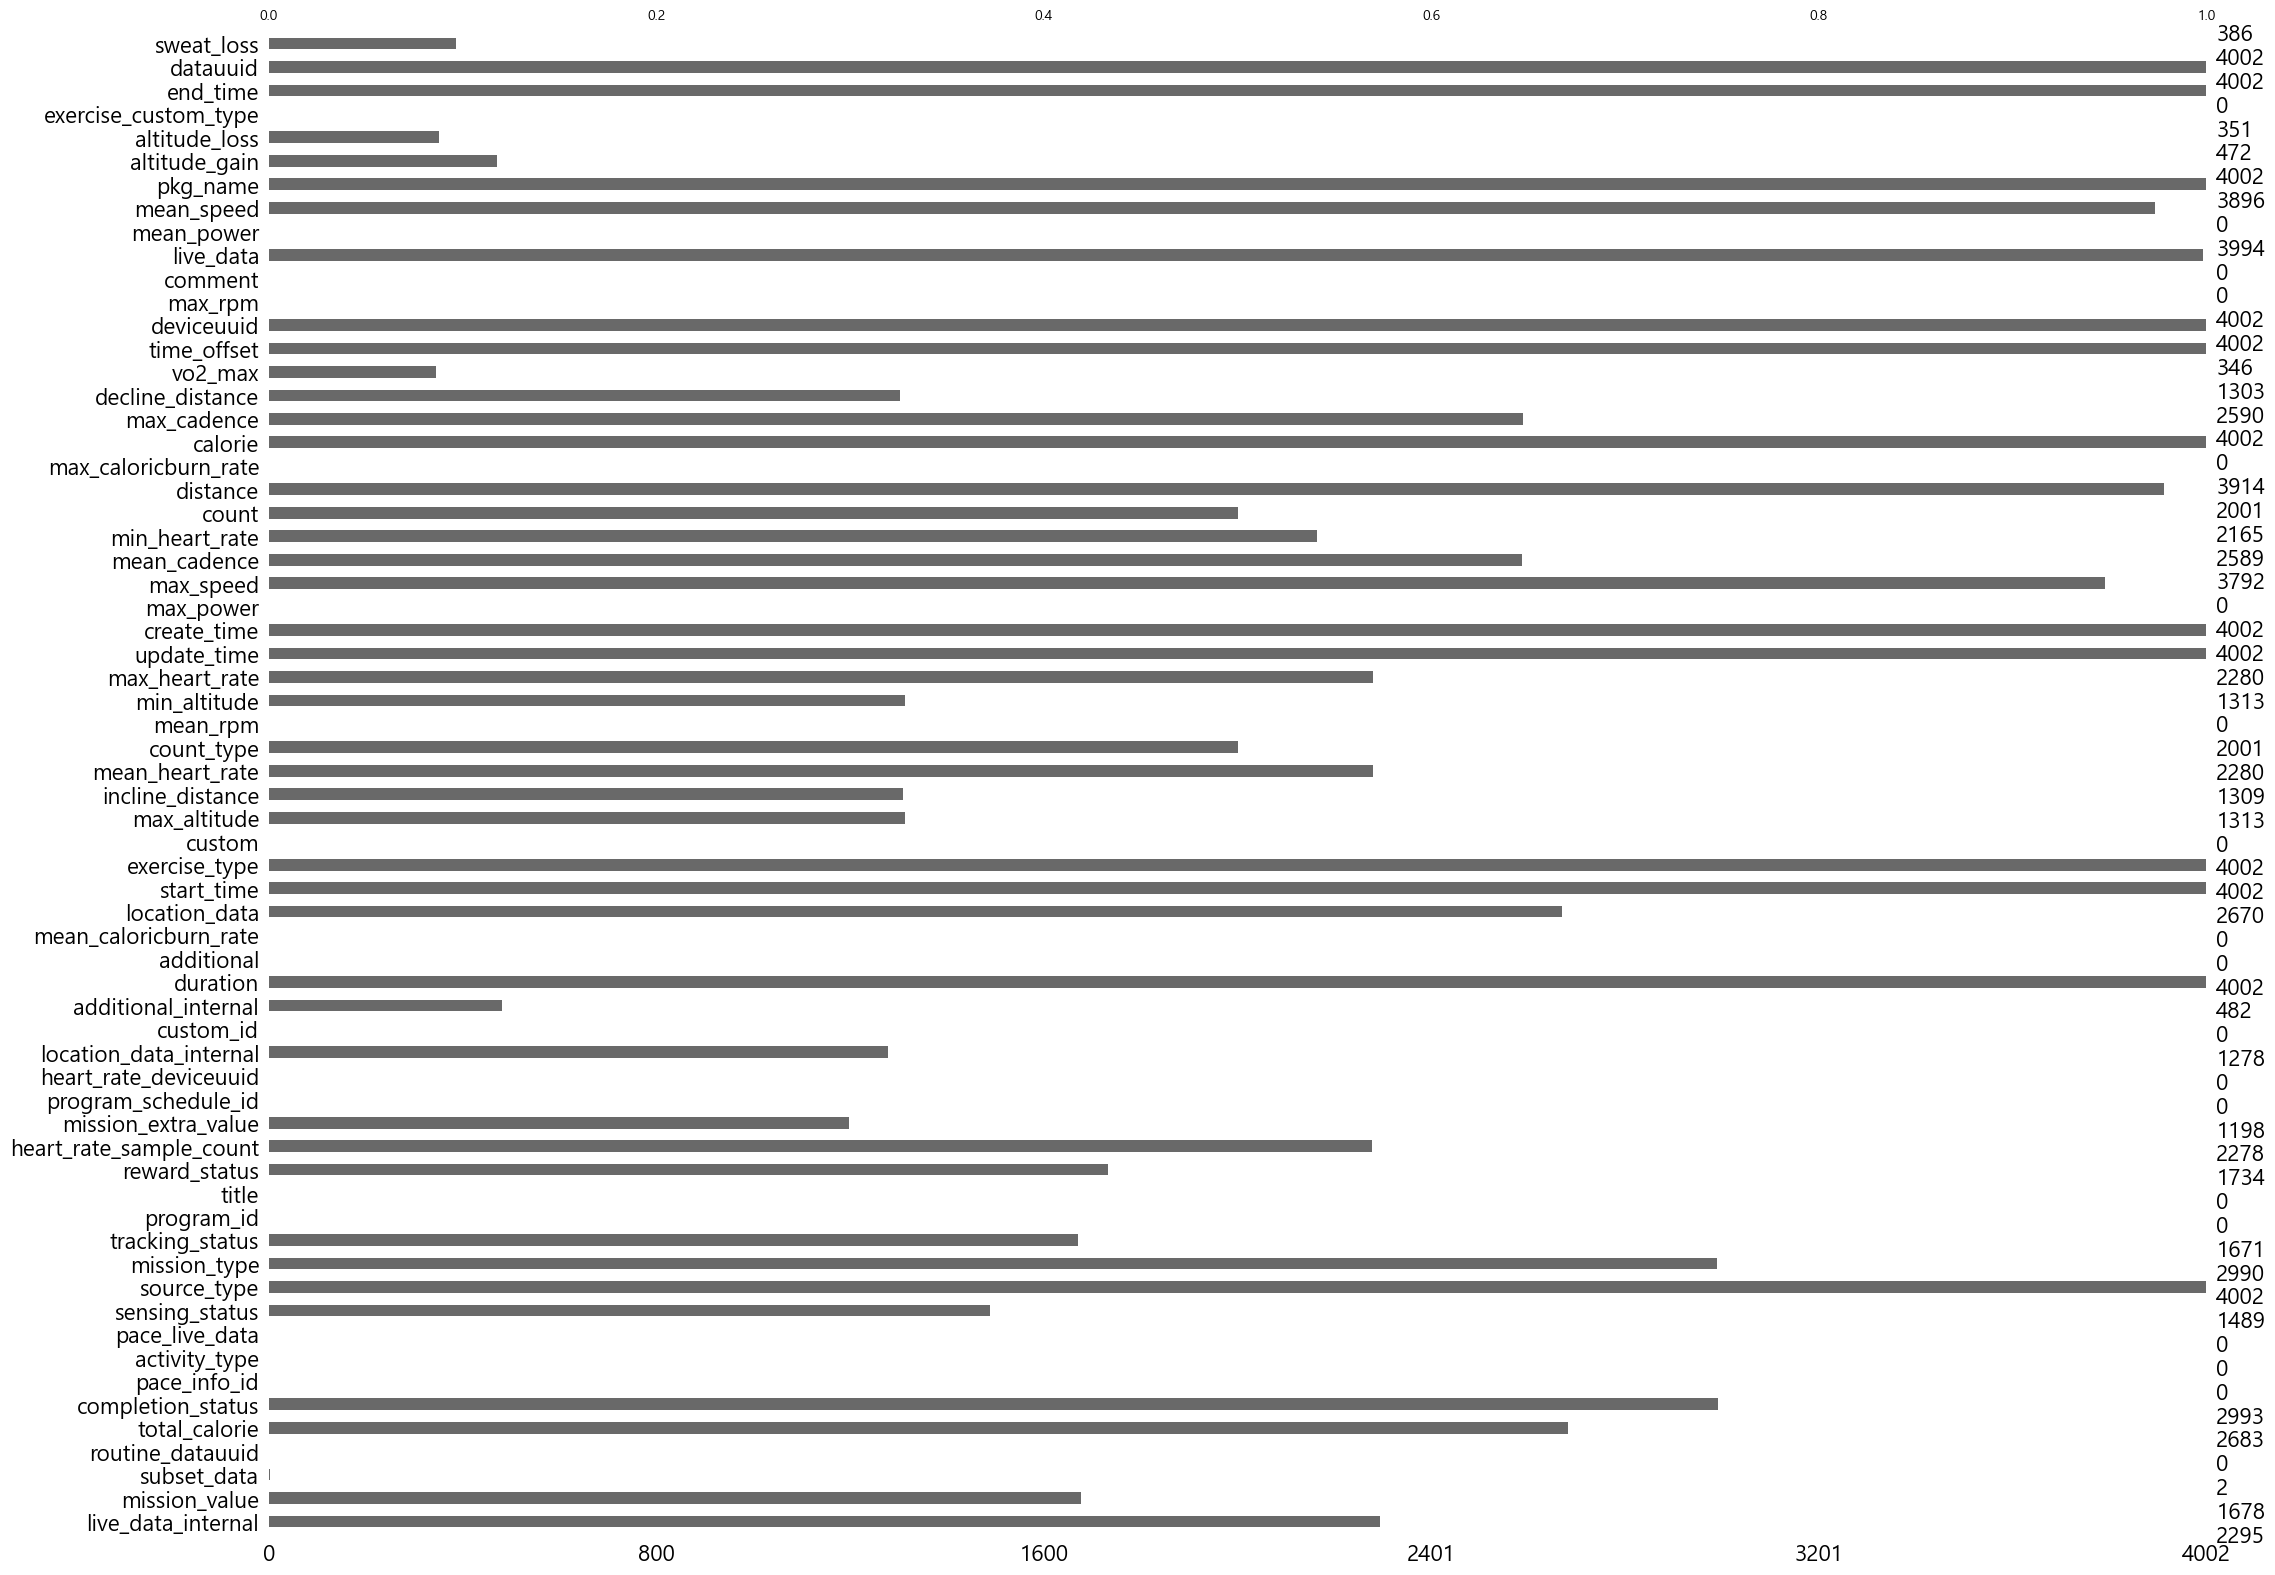

In [6]:
msno.bar(df_raw)  # 결측치 시각화를 위한 바 차트 생성

In [7]:

# 데이터프레임의 열에 데이터가 전체 다 없는 열을 제거하여 저장한다
df_drop = df_raw.dropna(axis=1, how='all')
df_drop

live_data_internal  mission_value  \
0                                                   NaN            0.0   
1                                                   NaN            0.0   
2                                                   NaN            0.0   
3                                                   NaN            0.0   
4                                                   NaN            0.0   
...                                                 ...            ...   
3997  1b0d1e2c-c847-45e4-90c7-f8956c90c3fb.live_data...            NaN   
3998  6d852a2d-efed-4d7d-8860-edf4533e8e77.live_data...            NaN   
3999  113c986b-87b9-4f80-8c33-fad0aff806f4.live_data...        10000.0   
4000  605ef585-5487-433b-9a87-ab9a9bbab8fe.live_data...         3000.0   
4001  b28f0965-32e1-4001-b747-4b6a7a8c7d93.live_data...            NaN   

     subset_data  total_calorie  completion_status  \
0            NaN      133.00000                0.0   
1            NaN       81.09000                0.0   
2            NaN      133.00000                0.0   
3            NaN      560.46000                0.0   
4            NaN       86.04000                0.0   
...          ...            ...                ...   
3997         NaN       80.00000                NaN   
3998         NaN       79.00000                NaN   
3999         NaN      292.07358                0.0   
4000         NaN      406.02112                1.0   
4001         NaN       71.00000                NaN   

                                         sensing_status  source_type  \
0                                                   NaN            4   
1                                                   NaN            4   
2                                                   NaN            4   
3                                                   NaN            4   
4                                                   NaN            4   
...                                                 ...          ...   
3997  1b0d1e2c-c847-45e4-90c7-f8956c90c3fb.sensing_s...            4   
3998  6d852a2d-efed-4d7d-8860-edf4533e8e77.sensing_s...            4   
3999  113c986b-87b9-4f80-8c33-fad0aff806f4.sensing_s...            1   
4000                                                NaN            1   
4001  b28f0965-32e1-4001-b747-4b6a7a8c7d93.sensing_s...            4   

      mission_type  tracking_status  reward_status  ...  time_offset  \
0              0.0              NaN            0.0  ...     UTC+0900   
1              0.0              NaN            0.0  ...     UTC+0900   
2              0.0              NaN            0.0  ...     UTC+0900   
3              0.0              NaN            0.0  ...     UTC+0900   
4              0.0              NaN            0.0  ...     UTC+0900   
...            ...              ...            ...  ...          ...   
3997           NaN              NaN            NaN  ...     UTC+0900   
3998           NaN              NaN            NaN  ...     UTC+0900   
3999           1.0              NaN            1.0  ...     UTC+0900   
4000           1.0              0.0            1.0  ...     UTC+0900   
4001           NaN              NaN            NaN  ...     UTC+0900   

      deviceuuid                                          live_data  \
0     D+ZRLAusfm  6fb6e7d1-52b6-fae4-4aa2-a30460a52764.com.samsu...   
1     D+ZRLAusfm  157dfbc8-b4d8-b5ef-a9a2-10d8fb1adb0e.com.samsu...   
2     D+ZRLAusfm  30db45fb-6135-7cd7-e622-d704b0f14c64.com.samsu...   
3     D+ZRLAusfm  8aff4932-8d35-140c-1869-2bc960eee8bf.com.samsu...   
4     D+ZRLAusfm  f63ee732-62f7-a379-a21d-b4c62dfd2221.com.samsu...   
...          ...                                                ...   
3997  u1u6Svklxm  1b0d1e2c-c847-45e4-90c7-f8956c90c3fb.com.samsu...   
3998  u1u6Svklxm  6d852a2d-efed-4d7d-8860-edf4533e8e77.com.samsu...   
3999  u1u6Svklxm  113c986b-87b9-4f80-8c33-fad0aff806f4.com.samsu...   
4000  9n+WOPFqMV  605ef585-5487-433b-9a87-ab9a9bbab8fe.com.

In [8]:
for column in df_drop.columns:  # df_drop의 각 column에 대해 반복문 실행
    print('='*50)  # 구분선 출력
    print(df_drop[column].value_counts())  # 해당 column의 값들의 빈도수 출력
    print('='*50)  # 구분선 출력


62d2488e-d01e-4e8a-9a52-49f39c092c54.live_data_internal.json    1
7483fd6f-e98f-4942-811f-baa12a343b9a.live_data_internal.json    1
e3a23622-0f58-4f35-a640-a9a92602bea1.live_data_internal.json    1
d96bfdaf-63f8-4c09-bb13-24d377c30a47.live_data_internal.json    1
5d5076bd-1756-4959-98ed-72333ae584f9.live_data_internal.json    1
                                                               ..
62a0ade3-8230-4171-b489-ad43c247ac41.live_data_internal.json    1
0e28d13c-4bbc-4e88-8b13-dc73cb70a357.live_data_internal.json    1
488e9074-67ca-499e-9435-ff655c39e9e7.live_data_internal.json    1
9ab468a4-e0cc-4c8e-b87b-ea049a77eb16.live_data_internal.json    1
b28f0965-32e1-4001-b747-4b6a7a8c7d93.live_data_internal.json    1
Name: live_data_internal, Length: 2295, dtype: int64
0.0            648
10000.0        449
1000.0         212
1500.0          60
3000.0          58
800.0           37
1800000.0       30
7000.0          27
5000.0          27
12000.0         26
11000.0         13
8000.0      

In [9]:
# 불필요한 열 삭제

del df_drop['live_data_internal']
del df_drop['subset_data']
del df_drop['completion_status']
del df_drop['source_type']
del df_drop['mission_type']
del df_drop['tracking_status']
del df_drop['reward_status']
del df_drop['mission_extra_value']
del df_drop['count_type']
del df_drop['update_time']
del df_drop['create_time']
del df_drop['time_offset']
del df_drop['pkg_name']

df_drop

mission_value  total_calorie  \
0               0.0      133.00000   
1               0.0       81.09000   
2               0.0      133.00000   
3               0.0      560.46000   
4               0.0       86.04000   
...             ...            ...   
3997            NaN       80.00000   
3998            NaN       79.00000   
3999        10000.0      292.07358   
4000         3000.0      406.02112   
4001            NaN       71.00000   

                                         sensing_status  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
3997  1b0d1e2c-c847-45e4-90c7-f8956c90c3fb.sensing_s...   
3998  6d852a2d-efed-4d7d-8860-edf4533e8e77.sensing_s...   
3999  113c986b-87b9-4f80-8c33-fad0aff806f4.sensing_s...   
4000                                                NaN   
4001  b28f0965-32e1-4001-b747-4b6a7a8c7d93.sensing_s...   

      heart_rate_sample_count  \
0                         0.0   
1                         0.0   
2                         0.0   
3                         0.0   
4                         0.0   
...                       ...   
3997                    496.0   
3998                     42.0   
3999                   1080.0   
4000                      NaN   
4001                    433.0   

                                 location_data_internal  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
3997                                                NaN   
3998                                                NaN   
3999  113c986b-87b9-4f80-8c33-fad0aff806f4.location_...   
4000  605ef585-5487-433b-9a87-ab9a9bbab8fe.location_...   
4001                                                NaN   

                                    additional_internal  duration  \
0                                                   NaN    600000   
1                                                   NaN    979015   
2                                                   NaN    600000   
3                                                   NaN   6220851   
4                                                   NaN    847898   
...                                                 ...       ...   
3997                                                NaN    710333   
3998                                                NaN    757662   
3999  113c986b-87b9-4f80-8c33-fad0aff806f4.additiona...   1116996   
4000                                                NaN   1240102   
4001                                                NaN    609108   

                                          location_data           start_time  \
0     6fb6e7d1-52b6-fae4-4aa2-a30460a52764.com.samsu...  2019-10-08 11:20:26   
1     157dfbc8-b4d8-b5ef-a9a2-10d8fb1adb0e.com.samsu...  2019-10-10 11:57:27   
2     30db45fb-6135-7cd7-e622-d704b0f14c64.com.samsu...  2019-10-17 11:19:57   
3     8aff4932-8d35-140c-1869-2bc960eee8bf.com.samsu...   2019-10-09 5:34:14   
4     f63ee732-62f7-a379-a21d-b4c62dfd2221.com.samsu...  2019-10-22 13:46:12   
...                                                 ...                  ...   
3997                                                NaN  2023-02-04 23:38:04   
3998                                                NaN   2023-02-05 3:28:55   
3999  113c986b-87b9-4f80-8c33-fad0aff806f4.com.samsu...  2023-02-05 11:37:59   
4000  605ef585-5487-433b-9a87-ab9a9bbab8fe.com.samsu...  2023-02-05 20:25:31   
4001                     

## 1. EDA 및 추가 전처리

<Figure size 1500x1500 with 0 Axes>

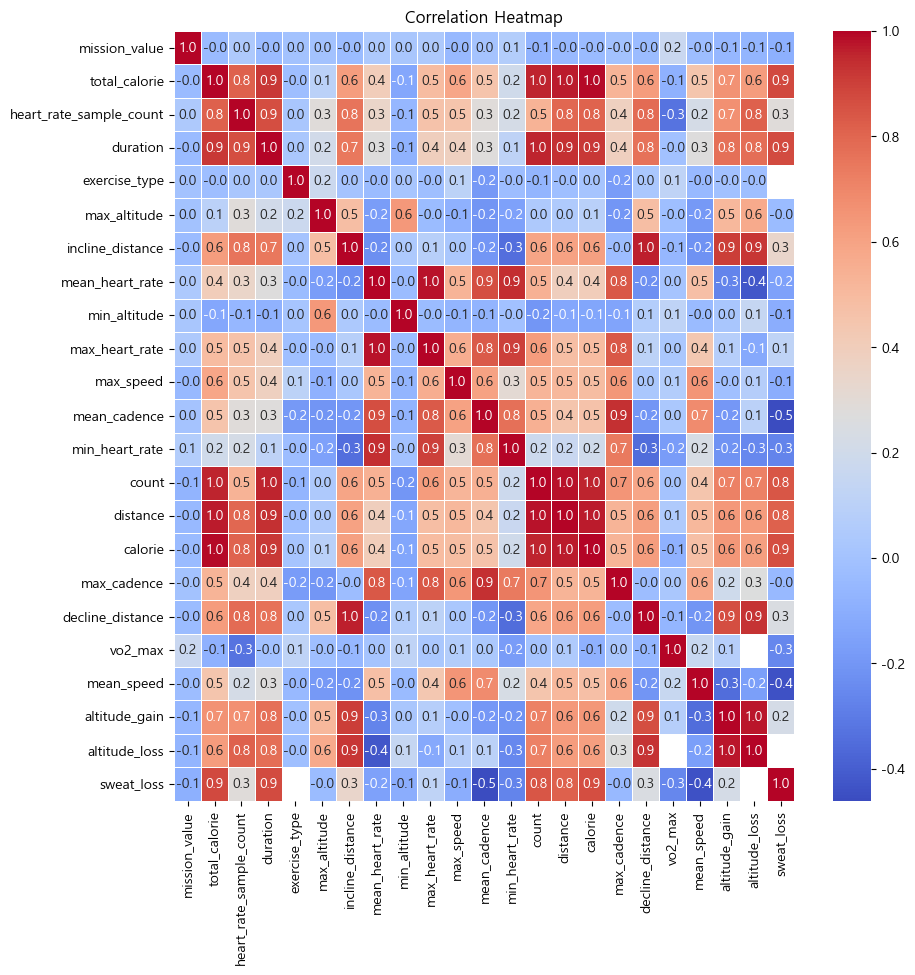

<Figure size 1500x1500 with 0 Axes>

In [10]:
df_num = df_drop.loc[:,df_drop.dtypes != object]
# 데이터프레임 df_num의 상관관계를 구한다.
corr = df_num.corr()

# 상관관계를 시각화하기 위해 히트맵을 그린다.
# cmap은 색상 맵을 설정한다.
# annot은 각 셀에 값을 표시할지 여부를 결정한다.
# fmt는 값의 표시 형식을 설정한다.
# linewidths는 셀 사이의 간격을 설정한다.
# 그래프의 크기를 15,15로 설정한다.
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.1f', linewidths=.5)

# 그래프의 제목을 설정한다.
plt.title('Correlation Heatmap')

# 그래프의 크기를 15,15로 설정한다.
plt.figure(figsize=(15,15))

In [11]:
# 'date' 컬럼 생성

df_drop['date'] = df_drop['start_time'].apply(lambda x:x.split(' ')[0])
df_drop.head(3)

C:\Users\ysj_1\AppData\Local\Temp\ipykernel_85056\298255260.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['date'] = df_drop['start_time'].apply(lambda x:x.split(' ')[0])


mission_value  total_calorie sensing_status  heart_rate_sample_count  \
0            0.0         133.00            NaN                      0.0   
1            0.0          81.09            NaN                      0.0   
2            0.0         133.00            NaN                      0.0   

  location_data_internal additional_internal  duration  \
0                    NaN                 NaN    600000   
1                    NaN                 NaN    979015   
2                    NaN                 NaN    600000   

                                       location_data           start_time  \
0  6fb6e7d1-52b6-fae4-4aa2-a30460a52764.com.samsu...  2019-10-08 11:20:26   
1  157dfbc8-b4d8-b5ef-a9a2-10d8fb1adb0e.com.samsu...  2019-10-10 11:57:27   
2  30db45fb-6135-7cd7-e622-d704b0f14c64.com.samsu...  2019-10-17 11:19:57   

   exercise_type  ...  vo2_max  deviceuuid  \
0          11007  ...      NaN  D+ZRLAusfm   
1           1001  ...      NaN  D+ZRLAusfm   
2          11007  ...      NaN  D+ZRLAusfm   

                                           live_data  mean_speed  \
0  6fb6e7d1-52b6-fae4-4aa2-a30460a52764.com.samsu...         NaN   
1  157dfbc8-b4d8-b5ef-a9a2-10d8fb1adb0e.com.samsu...    1.356866   
2  30db45fb-6135-7cd7-e622-d704b0f14c64.com.samsu...         NaN   

   altitude_gain  altitude_loss             end_time  \
0            NaN            NaN  2019-10-08 11:30:26   
1            NaN            NaN  2019-10-10 12:13:46   
2            NaN            NaN  2019-10-17 11:29:57   

                               datauuid  sweat_loss        date  
0  6fb6e7d1-52b6-fae4-4aa2-a30460a52764         NaN  2019-10-08  
1  157dfbc8-b4d8-b5ef-a9a2-10d8fb1adb0e         NaN  2019-10-10  
2  30db45fb-6135-7cd7-e622-d704b0f14c64         NaN  2019-10-17  

[3 rows x 33 columns]

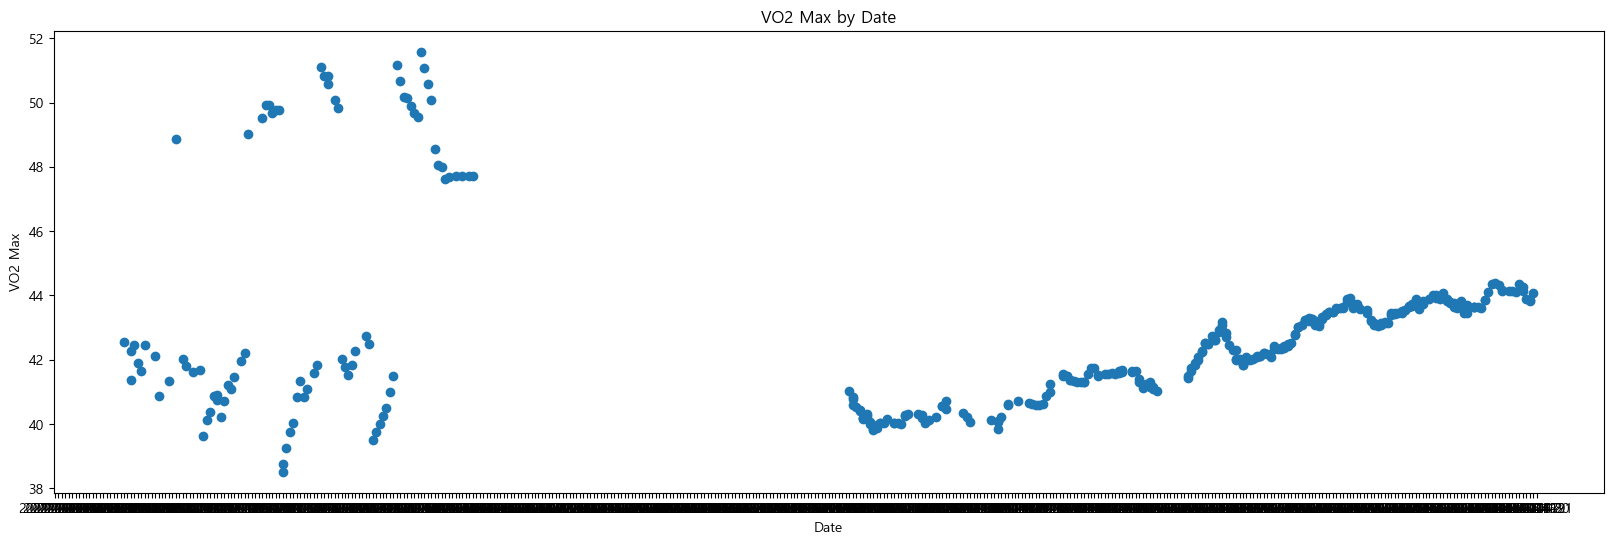

In [107]:
# 필요한 라이브러리 import
import matplotlib.pyplot as plt

# x축에 해당하는 날짜 데이터
x = df_drop.sort_values(by='date')['date']

# y축에 해당하는 vo2_max 데이터
y = df_drop.sort_values(by='date')['vo2_max']

# 그래프 크기 설정
plt.figure(figsize=(20, 6))

# 그래프 그리기
plt.scatter(x, y)

# x축 라벨 설정
plt.xlabel('Date')

# y축 라벨 설정
plt.ylabel('VO2 Max')

# 그래프 제목 설정
plt.title('VO2 Max by Date')


# 그래프 보여주기
plt.show()


In [122]:
# 체성분 데이터 불러오기

df_body = pd.read_csv('./inbody.csv',sep=',',header=0,index_col=1)
df_body.head()

No    체중  골격근량  체지방률  체지방량  5일평균_골격근량  5일평균_체지방량  5일평균_몸무게
일자                                                                    
2022-09-12   1  95.4  37.2  31.2  29.8        NaN        NaN       NaN
2022-09-13   2  95.4  37.2  31.2  29.8        NaN        NaN       NaN
2022-09-14   3  94.4  36.8  31.2  29.5        NaN        NaN       NaN
2022-09-15   4  94.7  37.4  30.4  28.8        NaN        NaN       NaN
2022-09-16   5  94.2  36.6  31.5  29.7      37.04      29.52     94.82

In [123]:
df_body.reset_index(inplace=True)
df_body

일자   No    체중  골격근량  체지방률  체지방량  5일평균_골격근량  5일평균_체지방량  5일평균_몸무게
0    2022-09-12    1  95.4  37.2  31.2  29.8        NaN        NaN       NaN
1    2022-09-13    2  95.4  37.2  31.2  29.8        NaN        NaN       NaN
2    2022-09-14    3  94.4  36.8  31.2  29.5        NaN        NaN       NaN
3    2022-09-15    4  94.7  37.4  30.4  28.8        NaN        NaN       NaN
4    2022-09-16    5  94.2  36.6  31.5  29.7      37.04      29.52     94.82
..          ...  ...   ...   ...   ...   ...        ...        ...       ...
216  2023-04-16  217  80.9  37.9  17.3  14.0      38.14      13.04     80.42
217  2023-04-17  218  81.7  38.3  16.9  13.8      38.14      13.32     80.74
218  2023-04-18  219  81.7  38.3  16.9  13.8      38.14      13.60     81.06
219  2023-04-19  220  81.7  38.3  16.9  13.8      38.14      13.88     81.38
220  2023-04-20  221  81.7  38.3  16.9  13.8      38.22      13.84     81.54

[221 rows x 9 columns]

In [124]:
df_body.columns

Index(['일자', 'No', '체중', '골격근량', '체지방률', '체지방량', '5일평균_골격근량', '5일평균_체지방량',
       '5일평균_몸무게'],
      dtype='object')

In [125]:

use_list = ['일자', '체중', '골격근량', '체지방률',
            '체지방량']  # use_list 변수에 사용할 컬럼 지정

# df_body_use 변수에 df_body의 use_list 컬럼만 추출하여 할당
df_body_use = df_body[use_list]

df_body_use.rename(columns={'일자': 'start_time',  # df_body_use의 컬럼명을 변경하기 위해 rename 메소드 사용
                            '체중': 'weight',
                            '골격근량': 'muscle',
                            '체지방률': 'fat_rate',
                            '체지방량': 'body_fat' }, inplace=True)  # inplace=True 옵션을 사용하여 df_body_use 자체를 수정

# date 컬럼 생성
df_body_use['date'] = df_body_use['start_time'].apply(lambda x:x.split(' ')[0])

# date 순으로 정렬
df_body_use.sort_values(by='date',inplace=True)

df_body_use  # 변경된 df_body_use 출력

C:\Users\ysj_1\AppData\Local\Temp\ipykernel_85056\1604115948.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_body_use.rename(columns={'일자': 'start_time',  # df_body_use의 컬럼명을 변경하기 위해 rename 메소드 사용
C:\Users\ysj_1\AppData\Local\Temp\ipykernel_85056\1604115948.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_body_use['date'] = df_body_use['start_time'].apply(lambda x:x.split(' ')[0])
C:\Users\ysj_1\AppData\Local\Temp\ipykernel_85056\1604115948.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cav

start_time  weight  muscle  fat_rate  body_fat        date
0    2022-09-12    95.4    37.2      31.2      29.8  2022-09-12
1    2022-09-13    95.4    37.2      31.2      29.8  2022-09-13
2    2022-09-14    94.4    36.8      31.2      29.5  2022-09-14
3    2022-09-15    94.7    37.4      30.4      28.8  2022-09-15
4    2022-09-16    94.2    36.6      31.5      29.7  2022-09-16
..          ...     ...     ...       ...       ...         ...
216  2023-04-16    80.9    37.9      17.3      14.0  2023-04-16
217  2023-04-17    81.7    38.3      16.9      13.8  2023-04-17
218  2023-04-18    81.7    38.3      16.9      13.8  2023-04-18
219  2023-04-19    81.7    38.3      16.9      13.8  2023-04-19
220  2023-04-20    81.7    38.3      16.9      13.8  2023-04-20

[221 rows x 6 columns]

In [127]:
df_body_use.sort_values(by='date',inplace=True)


C:\Users\ysj_1\AppData\Local\Temp\ipykernel_85056\4209269797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_body_use.sort_values(by='date',inplace=True)


In [128]:
# 'date' 열이 중복되는 경우, 첫번째 열을 제외하고 제거한다.
df_body_use.drop_duplicates(subset='date', keep='first',inplace=True)

C:\Users\ysj_1\AppData\Local\Temp\ipykernel_85056\2063260950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_body_use.drop_duplicates(subset='date', keep='first',inplace=True)


In [129]:
df_body_use.head()

start_time  weight  muscle  fat_rate  body_fat        date
0  2022-09-12    95.4    37.2      31.2      29.8  2022-09-12
1  2022-09-13    95.4    37.2      31.2      29.8  2022-09-13
2  2022-09-14    94.4    36.8      31.2      29.5  2022-09-14
3  2022-09-15    94.7    37.4      30.4      28.8  2022-09-15
4  2022-09-16    94.2    36.6      31.5      29.7  2022-09-16

In [130]:
# 분석에 필요없는 열 삭제
df_body_use = df_body_use.drop(['start_time'],axis=1).reset_index(drop=True).copy()

In [131]:
df_body_use.head()

weight  muscle  fat_rate  body_fat        date
0    95.4    37.2      31.2      29.8  2022-09-12
1    95.4    37.2      31.2      29.8  2022-09-13
2    94.4    36.8      31.2      29.5  2022-09-14
3    94.7    37.4      30.4      28.8  2022-09-15
4    94.2    36.6      31.5      29.7  2022-09-16

In [132]:
# 운동데이터와 inbody 데이터 결합

df_merge = pd.merge(left=df_drop,right=df_body_use,left_on=df_drop['date'],right_on=df_body_use['date'],how='left')
df_merge

key_0  mission_value  total_calorie  \
0     2016-09-26            NaN            NaN   
1     2016-09-26            NaN            NaN   
2     2016-09-26            NaN            NaN   
3     2016-10-06            NaN            NaN   
4     2016-10-06            NaN            NaN   
...          ...            ...            ...   
3997  2023-04-19            NaN       66.00000   
3998  2023-04-19        12000.0      466.69226   
3999  2023-04-20            NaN       78.00000   
4000  2023-04-20            8.0      670.81366   
4001  2023-04-21            NaN       79.00000   

                                         sensing_status  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
3997  a16c1569-22ad-46af-9c3a-c437b2f1d259.sensing_s...   
3998  34337681-bd4a-4811-8caa-5f728b7887e3.sensing_s...   
3999  5775ee98-dc57-49f9-b355-3fa16acb5483.sensing_s...   
4000  a5d8912b-6313-41b1-a6d1-056a6b6f37a1.sensing_s...   
4001  b19aa55a-1f17-4ab7-a9a8-0566df12a2b6.sensing_s...   

      heart_rate_sample_count  \
0                         NaN   
1                         NaN   
2                         NaN   
3                         NaN   
4                         NaN   
...                       ...   
3997                    440.0   
3998                   1641.0   
3999                    552.0   
4000                   2264.0   
4001                    531.0   

                                 location_data_internal  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
3997                                                NaN   
3998  34337681-bd4a-4811-8caa-5f728b7887e3.location_...   
3999                                                NaN   
4000  a5d8912b-6313-41b1-a6d1-056a6b6f37a1.location_...   
4001                                                NaN   

                                    additional_internal  duration  \
0                                                   NaN    786244   
1                                                   NaN    808126   
2                                                   NaN    839140   
3                                                   NaN    767823   
4                                                   NaN   1278742   
...                                                 ...       ...   
3997                                                NaN    600932   
3998  34337681-bd4a-4811-8caa-5f728b7887e3.additiona...   1670910   
3999                                                NaN    716584   
4000  a5d8912b-6313-41b1-a6d1-056a6b6f37a1.additiona...   2297666   
4001                                                NaN    708603   

                                          location_data           start_time  \
0                                                   NaN   2016-09-26 2:11:00   
1                                                   NaN  2016-09-26 12:00:01   
2                                                   NaN  2016-09-26 15:15:05   
3                                                   NaN  2016-10-06 13:12:18   
4                                                   NaN  2016-10-06 14:20:07   
...                                                 ...                  ...   
3997                                                NaN  2023-04-19 10:47:57   
3998  34337681-bd4a-4811-8caa-5f728b7887e3.com.samsu...  2023-04-19 12:04:45   
3999                                          

In [133]:
df_merge = df_merge.drop(['date_x','date_y'],axis=1).rename(columns={'key_0':'date'})

In [134]:

# df_merge 데이터프레임의 'date' 컬럼의 데이터타입을 date타입으로 변경
df_merge['date'] = pd.to_datetime(df_merge['date'])
df_merge

date  mission_value  total_calorie  \
0    2016-09-26            NaN            NaN   
1    2016-09-26            NaN            NaN   
2    2016-09-26            NaN            NaN   
3    2016-10-06            NaN            NaN   
4    2016-10-06            NaN            NaN   
...         ...            ...            ...   
3997 2023-04-19            NaN       66.00000   
3998 2023-04-19        12000.0      466.69226   
3999 2023-04-20            NaN       78.00000   
4000 2023-04-20            8.0      670.81366   
4001 2023-04-21            NaN       79.00000   

                                         sensing_status  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
3997  a16c1569-22ad-46af-9c3a-c437b2f1d259.sensing_s...   
3998  34337681-bd4a-4811-8caa-5f728b7887e3.sensing_s...   
3999  5775ee98-dc57-49f9-b355-3fa16acb5483.sensing_s...   
4000  a5d8912b-6313-41b1-a6d1-056a6b6f37a1.sensing_s...   
4001  b19aa55a-1f17-4ab7-a9a8-0566df12a2b6.sensing_s...   

      heart_rate_sample_count  \
0                         NaN   
1                         NaN   
2                         NaN   
3                         NaN   
4                         NaN   
...                       ...   
3997                    440.0   
3998                   1641.0   
3999                    552.0   
4000                   2264.0   
4001                    531.0   

                                 location_data_internal  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
3997                                                NaN   
3998  34337681-bd4a-4811-8caa-5f728b7887e3.location_...   
3999                                                NaN   
4000  a5d8912b-6313-41b1-a6d1-056a6b6f37a1.location_...   
4001                                                NaN   

                                    additional_internal  duration  \
0                                                   NaN    786244   
1                                                   NaN    808126   
2                                                   NaN    839140   
3                                                   NaN    767823   
4                                                   NaN   1278742   
...                                                 ...       ...   
3997                                                NaN    600932   
3998  34337681-bd4a-4811-8caa-5f728b7887e3.additiona...   1670910   
3999                                                NaN    716584   
4000  a5d8912b-6313-41b1-a6d1-056a6b6f37a1.additiona...   2297666   
4001                                                NaN    708603   

                                          location_data           start_time  \
0                                                   NaN   2016-09-26 2:11:00   
1                                                   NaN  2016-09-26 12:00:01   
2                                                   NaN  2016-09-26 15:15:05   
3                                                   NaN  2016-10-06 13:12:18   
4                                                   NaN  2016-10-06 14:20:07   
...                                                 ...                  ...   
3997                                                NaN  2023-04-19 10:47:57   
3998  34337681-bd4a-4811-8caa-5f728b7887e3.com.samsu...  2023-04-19 12:04:45   
3999                                                NaN   

### 데이터를 통한 체성분, VO2_MAX의 변화추이를 확인

C:\Users\ysj_1\AppData\Local\Temp\ipykernel_85056\1497727646.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weight.sort_values(by='date',inplace=True)


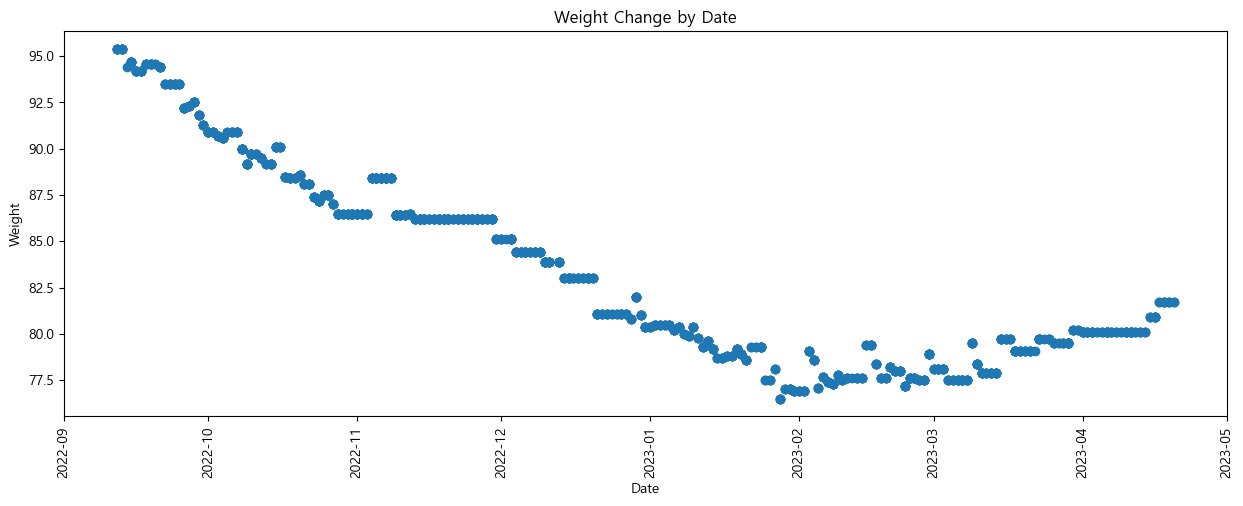

In [135]:
# weight 입력 정보를 통해 분석

df_merge_weight = df_merge[df_merge['weight'].notnull()]

# date와 weight 열만 추출하여 새로운 데이터프레임 생성
df_weight = df_merge_weight[['date', 'weight']]

df_weight.sort_values(by='date',inplace=True)

# date를 인덱스로 설정
df_weight.set_index('date', inplace=True)
df_weight = df_weight.loc['20220501':,:]

# 그래프 크기 설정
plt.figure(figsize=(15, 5))

# 그래프 그리기 (점 그래프)
plt.plot(df_weight, marker='o', linestyle='')

# 그래프 타이틀, x축, y축 라벨 설정
plt.title('Weight Change by Date')
plt.xlabel('Date')
plt.ylabel('Weight')

# x축 라벨 90도 회전
plt.xticks(rotation=90)

# 그래프 출력
plt.show()


- 2022년 7월부터 대략 30KG의 체중을 감량한 것을 확인

C:\Users\ysj_1\AppData\Local\Temp\ipykernel_85056\3391933363.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_body_fat.sort_values(by='date',inplace=True)


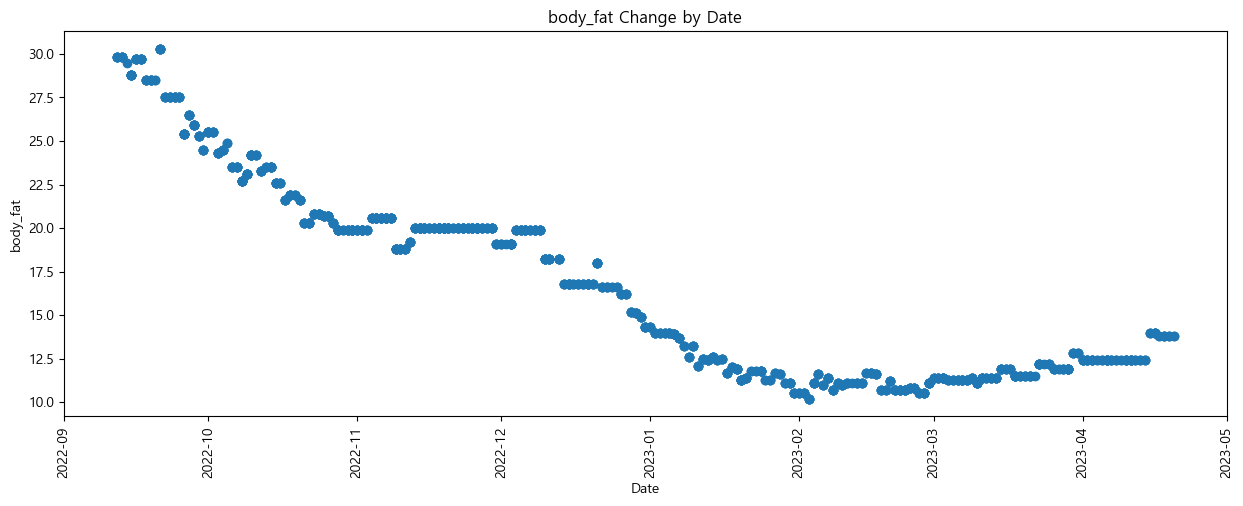

In [136]:
# body_fat 입력 정보를 통해 분석

df_merge_fat = df_merge[df_merge['body_fat'].notnull()]

# date와 body_fat 열만 추출하여 새로운 데이터프레임 생성
df_body_fat = df_merge_fat[['date', 'body_fat']]

df_body_fat.sort_values(by='date',inplace=True)

# date를 인덱스로 설정
df_body_fat.set_index('date', inplace=True)
df_body_fat = df_body_fat.loc['20220501':,:]

# 그래프 크기 설정
plt.figure(figsize=(15, 5))

# 그래프 그리기 (점 그래프)
plt.plot(df_body_fat, marker='o', linestyle='')

# 그래프 타이틀, x축, y축 라벨 설정
plt.title('body_fat Change by Date')
plt.xlabel('Date')
plt.ylabel('body_fat')

# x축 라벨 90도 회전
plt.xticks(rotation=90)

# 그래프 출력
plt.show()


- 체지방도 35%에서 10% 초반대로 대략 20%정도 줄어든 것을 확인

C:\Users\ysj_1\AppData\Local\Temp\ipykernel_85056\1393827072.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_muscle.sort_values(by='date',inplace=True)


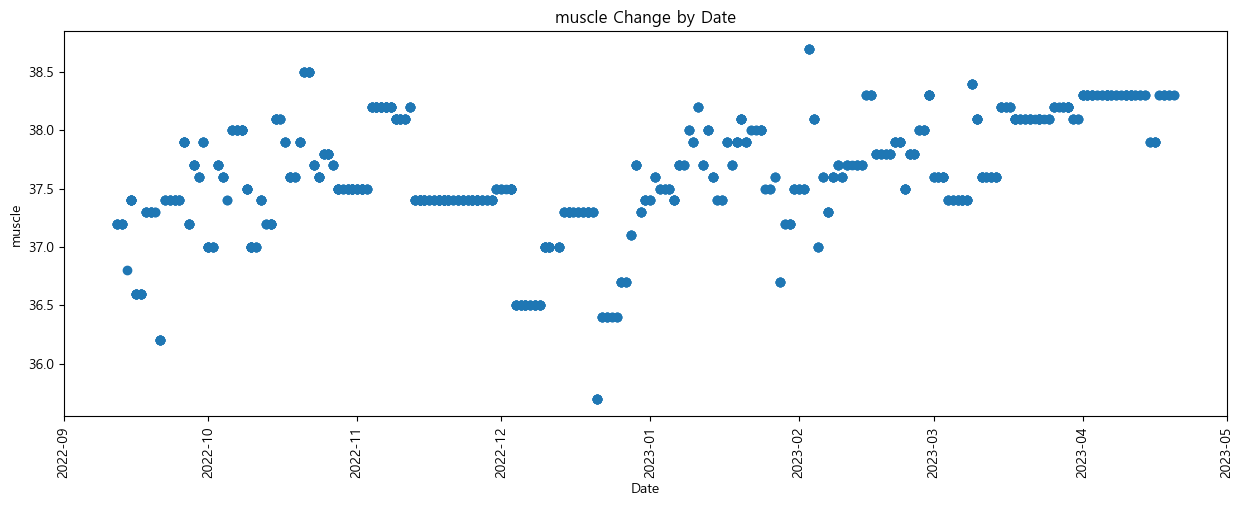

In [137]:
# muscle 입력 정보를 통해 분석

df_merge_muscle = df_merge[df_merge['muscle'].notnull()]

# date와 muscle 열만 추출하여 새로운 데이터프레임 생성
df_muscle = df_merge_muscle[['date', 'muscle']]

df_muscle.sort_values(by='date',inplace=True)

# date를 인덱스로 설정
df_muscle.set_index('date', inplace=True)
df_muscle = df_muscle.loc['20220501':,:]

# 그래프 크기 설정
plt.figure(figsize=(15, 5))

# 그래프 그리기 (점 그래프)
plt.plot(df_muscle, marker='o', linestyle='')

# 그래프 타이틀, x축, y축 라벨 설정
plt.title('muscle Change by Date')
plt.xlabel('Date')
plt.ylabel('muscle')

# x축 라벨 90도 회전
plt.xticks(rotation=90)

# 그래프 출력
plt.show()


- 사실상 인바디의 근육량의 분석값은 체중에서 각종 측정치를 제외한 추정치이기 때문에 정확도가 그렇게 높다고 보기 힘들다. 하지만 추이로 봤을때는 약간의 증가이후 유지하는 형태이다.

C:\Users\ysj_1\AppData\Local\Temp\ipykernel_85056\4194203290.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vo2_max.sort_values(by='date',inplace=True)


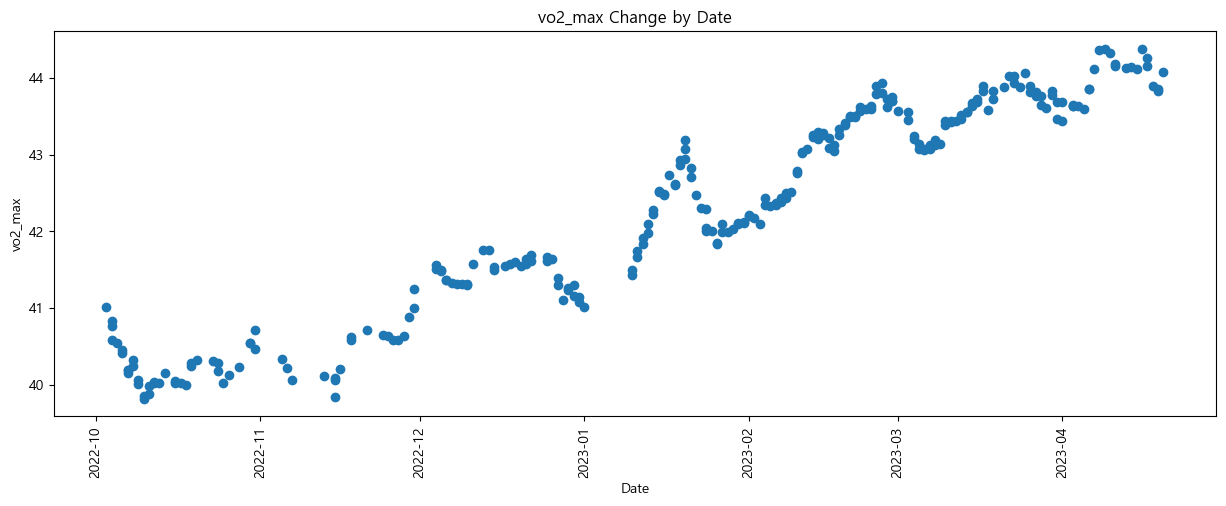

In [138]:
# vo2_max 입력 정보를 통해 분석

df_merge_vo2_max = df_merge[df_merge['vo2_max'].notnull()]

# date와 vo2_max 열만 추출하여 새로운 데이터프레임 생성
df_vo2_max = df_merge_vo2_max[['date', 'vo2_max']]

df_vo2_max.sort_values(by='date',inplace=True)

# date를 인덱스로 설정
df_vo2_max.set_index('date', inplace=True)
df_vo2_max = df_vo2_max.loc['20220501':,:]

# 그래프 크기 설정
plt.figure(figsize=(15, 5))

# 그래프 그리기 (점 그래프)
plt.plot(df_vo2_max, marker='o', linestyle='')

# 그래프 타이틀, x축, y축 라벨 설정
plt.title('vo2_max Change by Date')
plt.xlabel('Date')
plt.ylabel('vo2_max')

# x축 라벨 90도 회전
plt.xticks(rotation=90)

# 그래프 출력
plt.show()


- 유산소 능력을 보여주는 VO2_MAX는 대략적으로 증가하는 형태를 보여준다.



In [139]:
# 운동데이터가 존재하는 데이터에 한해서 분석하기 

df_merge = df_merge[df_merge['vo2_max'].notnull()]

In [140]:
# 데이터를 확인하기 쉽게 단위변환을 한다.

df_merge['mean_speed'] = df_merge['mean_speed'].apply(lambda x : (3.136289 * 318 / x)/60 )

df_merge['duration'] = df_merge['duration'].apply(lambda x : round(x/60000,0))

df_merge['mean_cadence'] = df_merge['mean_cadence'].round()

df_merge['distance'] = df_merge['distance'].apply(lambda x : round(x/1000,2))

df_merge

C:\Users\ysj_1\AppData\Local\Temp\ipykernel_85056\1435122516.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge['mean_speed'] = df_merge['mean_speed'].apply(lambda x : (3.136289 * 318 / x)/60 )
C:\Users\ysj_1\AppData\Local\Temp\ipykernel_85056\1435122516.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge['duration'] = df_merge['duration'].apply(lambda x : round(x/60000,0))
C:\Users\ysj_1\AppData\Local\Temp\ipykernel_85056\1435122516.py:7: SettingWithCopyWarning: 
A value is trying to be 

date  mission_value  total_calorie  \
2417 2021-09-30            NaN     1292.23300   
2419 2021-10-02            NaN     1484.16050   
2420 2021-10-02            NaN     1003.54224   
2421 2021-10-03            NaN     1627.74210   
2422 2021-10-06            NaN     1499.03140   
...         ...            ...            ...   
3991 2023-04-17        12000.0      327.81323   
3993 2023-04-18        12000.0      499.86670   
3996 2023-04-19        12000.0      290.67743   
3998 2023-04-19        12000.0      466.69226   
4000 2023-04-20            8.0      670.81366   

                                         sensing_status  \
2417  edfc537a-f3d2-49dc-bbd3-f11d925d915a.sensing_s...   
2419  ca26f175-7092-4941-b65f-93f6e6a0828a.sensing_s...   
2420  95c7b623-2655-4725-a427-e3abd4b1a975.sensing_s...   
2421  caa7c9c6-6a06-4337-8b5d-5fa618e89942.sensing_s...   
2422  6f425edd-daee-4038-b156-9e105ec23c81.sensing_s...   
...                                                 ...   
3991  f00d3b7c-aae5-4ea9-8b94-5d4bb9aef4a2.sensing_s...   
3993  747e39ec-b2bd-4f00-bf22-7edb6ec085cc.sensing_s...   
3996  4b651196-f33d-4885-884e-060e4488c59b.sensing_s...   
3998  34337681-bd4a-4811-8caa-5f728b7887e3.sensing_s...   
4000  a5d8912b-6313-41b1-a6d1-056a6b6f37a1.sensing_s...   

      heart_rate_sample_count  \
2417                    660.0   
2419                    769.0   
2420                    524.0   
2421                    917.0   
2422                    829.0   
...                       ...   
3991                   1103.0   
3993                   1969.0   
3996                   1040.0   
3998                   1641.0   
4000                   2264.0   

                                 location_data_internal  \
2417  edfc537a-f3d2-49dc-bbd3-f11d925d915a.location_...   
2419  ca26f175-7092-4941-b65f-93f6e6a0828a.location_...   
2420  95c7b623-2655-4725-a427-e3abd4b1a975.location_...   
2421  caa7c9c6-6a06-4337-8b5d-5fa618e89942.location_...   
2422  6f425edd-daee-4038-b156-9e105ec23c81.location_...   
...                                                 ...   
3991  f00d3b7c-aae5-4ea9-8b94-5d4bb9aef4a2.location_...   
3993  747e39ec-b2bd-4f00-bf22-7edb6ec085cc.location_...   
3996  4b651196-f33d-4885-884e-060e4488c59b.location_...   
3998  34337681-bd4a-4811-8caa-5f728b7887e3.location_...   
4000  a5d8912b-6313-41b1-a6d1-056a6b6f37a1.location_...   

                                    additional_internal  duration  \
2417  edfc537a-f3d2-49dc-bbd3-f11d925d915a.additiona...     106.0   
2419  ca26f175-7092-4941-b65f-93f6e6a0828a.additiona...     125.0   
2420  95c7b623-2655-4725-a427-e3abd4b1a975.additiona...      83.0   
2421  caa7c9c6-6a06-4337-8b5d-5fa618e89942.additiona...     150.0   
2422  6f425edd-daee-4038-b156-9e105ec23c81.additiona...     135.0   
...                                                 ...       ...   
3991  f00d3b7c-aae5-4ea9-8b94-5d4bb9aef4a2.additiona...      19.0   
3993  747e39ec-b2bd-4f00-bf22-7edb6ec085cc.additiona...      33.0   
3996  4b651196-f33d-4885-884e-060e4488c59b.additiona...      17.0   
3998  34337681-bd4a-4811-8caa-5f728b7887e3.additiona...      28.0   
4000  a5d8912b-6313-41b1-a6d1-056a6b6f37a1.additiona...      38.0   

                                          location_data           start_time  \
2417  edfc537a-f3d2-49dc-bbd3-f11d925d915a.com.samsu...  2021-09-30 12:18:00   
2419  ca26f175-7092-4941-b65f-93f6e6a0828a.com.samsu...  2021-10-02 12:16:30   
2420  95c7b623-2655-4725-a427-e3abd4b1a975.com.samsu...  2021-10-02 23:03:52   
2421  caa7c9c6-6a06-4337-8b5d-5fa618e89942.com.samsu...  2021-10-03 12:32:01   
2422  6f425edd-daee-4038-b156-9e105ec23c81.com.samsu...  2021-10-06 11:34:10   
...                                                 ...                  ...   
3991  f00d3b7c-aae5-4ea9-8b94-5d4bb9aef4a2.com.samsu...  2023-04-17 20:43:42   
3993  747e39ec-b2bd-4f00-bf22-7edb6ec085cc.com.samsu...  2023-04-18 11:05:55   
3996  4b651196-f33d-4885-884e-060e4488c59b.com.samsu...   

In [141]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 2417 to 4000
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     346 non-null    datetime64[ns]
 1   mission_value            313 non-null    float64       
 2   total_calorie            346 non-null    float64       
 3   sensing_status           346 non-null    object        
 4   heart_rate_sample_count  346 non-null    float64       
 5   location_data_internal   346 non-null    object        
 6   additional_internal      341 non-null    object        
 7   duration                 346 non-null    float64       
 8   location_data            346 non-null    object        
 9   start_time               346 non-null    object        
 10  exercise_type            346 non-null    int64         
 11  max_altitude             346 non-null    float64       
 12  incline_distance         333 non

In [142]:
# 자료상 지정된 exercise_type으로 df분할

df_merge_extype1 = df_merge[df_merge['exercise_type'] == 1001]
df_merge_extype2 = df_merge[df_merge['exercise_type'] == 1002]


df_merge_extype1.shape,df_merge_extype2.shape

((5, 37), (341, 37))

C:\Users\ysj_1\AppData\Local\Temp\ipykernel_85056\649885563.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_num.corr()


<Figure size 1500x1500 with 0 Axes>

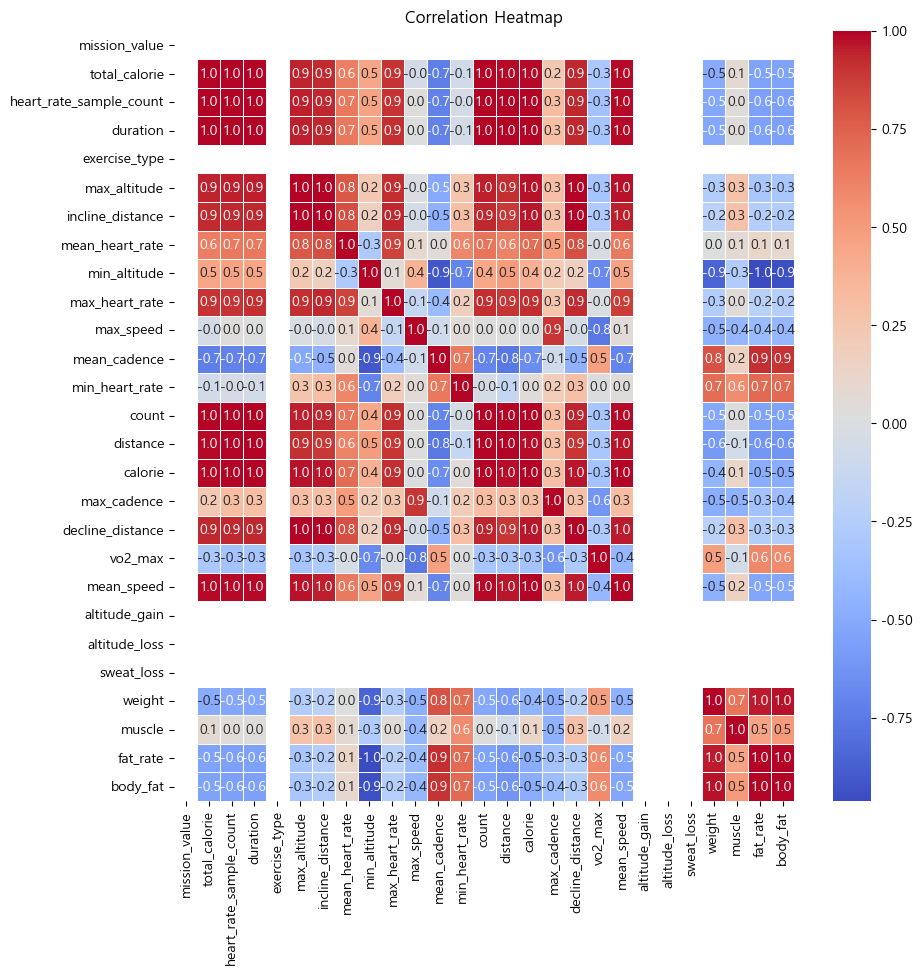

<Figure size 1500x1500 with 0 Axes>

In [143]:
df_num = df_merge_extype1.loc[:,df_merge_extype1.dtypes != object]
# 데이터프레임 df_num의 상관관계를 구한다.
corr = df_num.corr()

# 상관관계를 시각화하기 위해 히트맵을 그린다.
# cmap은 색상 맵을 설정한다.
# annot은 각 셀에 값을 표시할지 여부를 결정한다.
# fmt는 값의 표시 형식을 설정한다.
# linewidths는 셀 사이의 간격을 설정한다.
# 그래프의 크기를 15,15로 설정한다.
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.1f', linewidths=.5)

# 그래프의 제목을 설정한다.
plt.title('Correlation Heatmap')

# 그래프의 크기를 15,15로 설정한다.
plt.figure(figsize=(15,15))

C:\Users\ysj_1\AppData\Local\Temp\ipykernel_85056\3313426696.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_num.corr()


<Figure size 1500x1500 with 0 Axes>

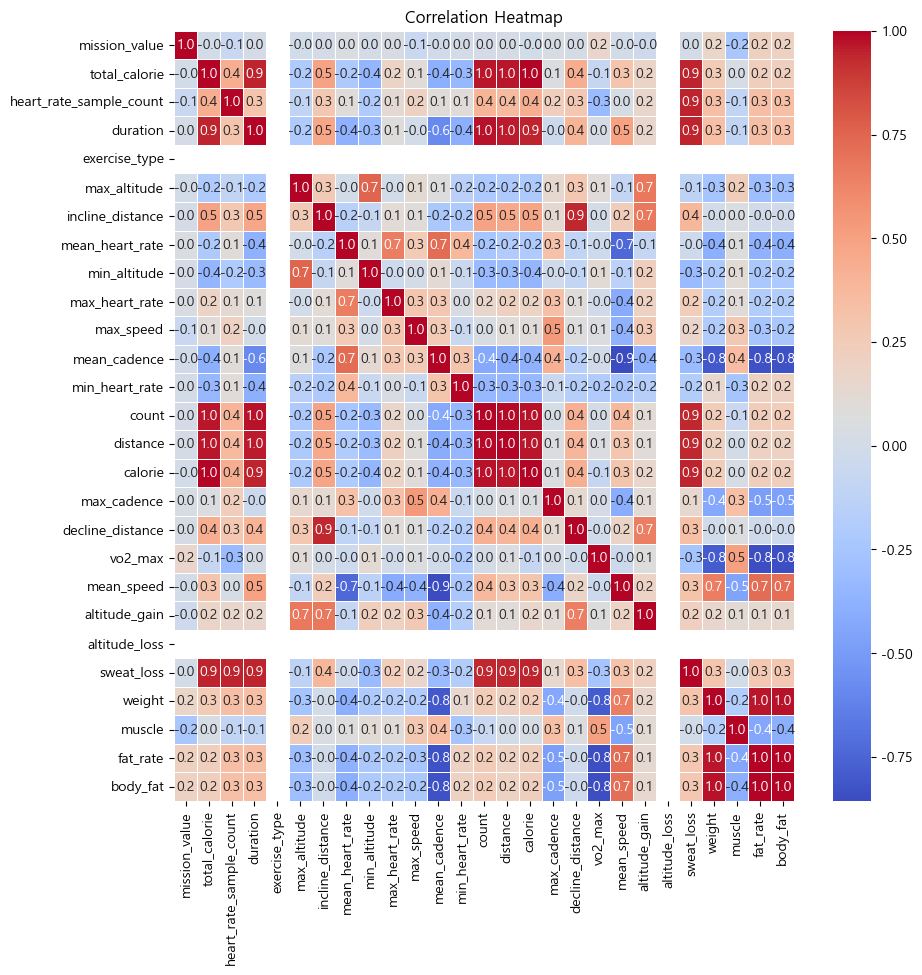

<Figure size 1500x1500 with 0 Axes>

In [144]:
df_num = df_merge_extype2.loc[:,df_merge_extype2.dtypes != object]
# 데이터프레임 df_num의 상관관계를 구한다.
corr = df_num.corr()

# 상관관계를 시각화하기 위해 히트맵을 그린다.
# cmap은 색상 맵을 설정한다.
# annot은 각 셀에 값을 표시할지 여부를 결정한다.
# fmt는 값의 표시 형식을 설정한다.
# linewidths는 셀 사이의 간격을 설정한다.
# 그래프의 크기를 15,15로 설정한다.
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.1f', linewidths=.5)

# 그래프의 제목을 설정한다.
plt.title('Correlation Heatmap')

# 그래프의 크기를 15,15로 설정한다.
plt.figure(figsize=(15,15))

- 상관관계상 체중과 관련된 피쳐와 상관관계가 높은 것으로 나타난다.

### 지정 운동의 데이터를 불러와서 데이터 확인

#### type 1의 운동 확인

In [145]:
import json

# json 파일 경로
path = './samsunghealth_821055484341_20230421142606/jsons/com.samsung.shealth.exercise/'
id = df_merge_extype1['datauuid'].to_list()[0]
exercise_path = '.com.samsung.health.exercise.live_data.json'
# json 파일 열기
with open(path+id+exercise_path, 'r') as f:
    # json 파일 읽기
    data_exerise = json.load(f)

df_exercise = pd.DataFrame(data_exerise)

In [146]:
df_exercise

heart_rate     start_time  cadence  speed   distance
0           88.0  1664883280814      NaN    NaN        NaN
1           87.0  1664883281814      NaN    NaN        NaN
2           86.0  1664883282814      NaN    NaN        NaN
3           86.0  1664883283814      NaN    NaN        NaN
4           86.0  1664883284814      NaN    NaN        NaN
...          ...            ...      ...    ...        ...
2950         NaN  1664886043335    112.0  1.291  12.143066
2951         NaN  1664886053338    112.0  1.300  14.830078
2952         NaN  1664886063259    113.0  1.307  11.958984
2953         NaN  1664886073150    114.0  1.324  13.531982
2954         NaN  1664886079081      NaN    NaN   8.758057

[2955 rows x 5 columns]

In [147]:
import numpy as np
df_exercise['exercise_time'] = (df_exercise['start_time']/1000).astype('int')- (df_exercise['start_time']/1000).astype('int').min()

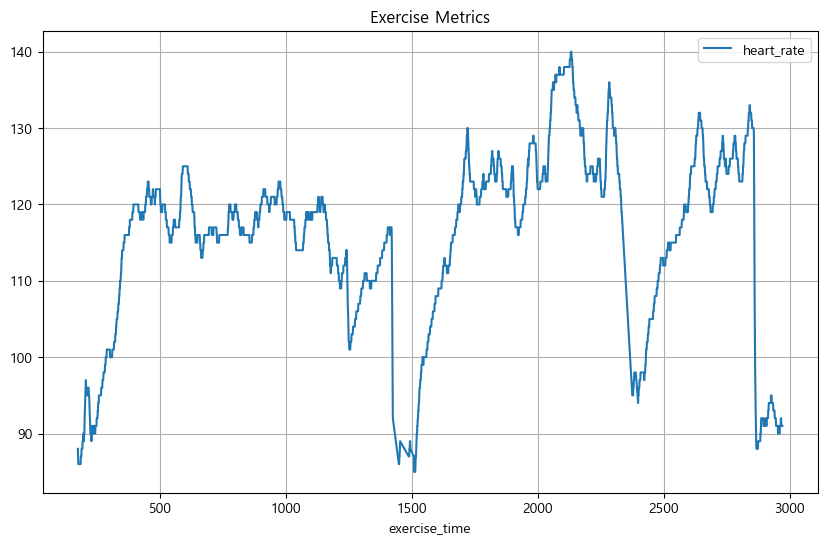

In [148]:

# exercise_time에 따른 heart_rate, cadence, distance, speed의 변화를 꺾은선 그래프로 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# exercise_time을 x축으로 설정
ax.set_xlabel('exercise_time')

# 각 변수에 대한 꺾은선 그래프 그리기
ax.plot(df_exercise['exercise_time'],
        df_exercise['heart_rate'], label='heart_rate')


# 범례 추가
ax.legend()

# 그래프 제목 추가
ax.set_title('Exercise Metrics')
plt.grid(True)
# 그래프 보여주기
plt.show()


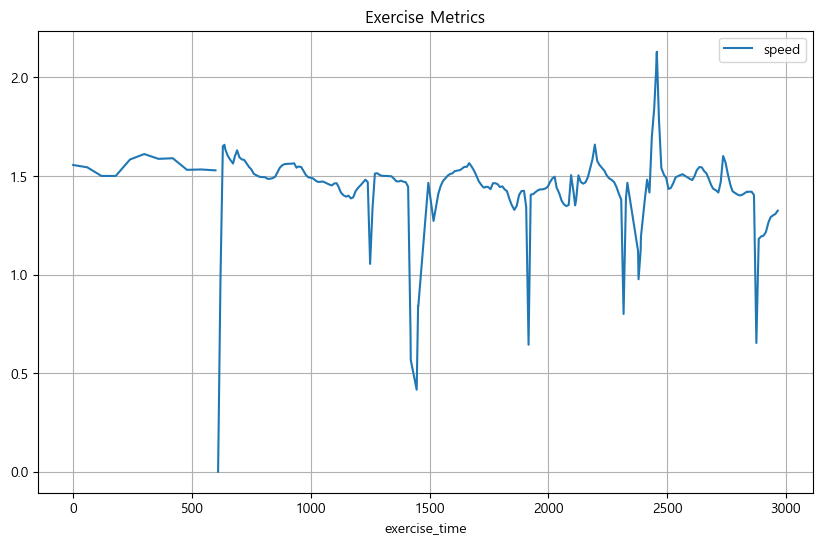

In [149]:

# exercise_time에 따른 heart_rate, cadence, distance, speed의 변화를 꺾은선 그래프로 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# exercise_time을 x축으로 설정
ax.set_xlabel('exercise_time')

# 각 변수에 대한 꺾은선 그래프 그리기

ax.plot(df_exercise['exercise_time'], df_exercise['speed'], label='speed')

# 범례 추가
ax.legend()

# 그래프 제목 추가
ax.set_title('Exercise Metrics')
plt.grid(True)
# 그래프 보여주기
plt.show()


- type 1의 운동은 걷는 것으로 판단된다.

In [150]:

# json 파일 경로
path = './samsunghealth_821055484341_20230421142606/jsons/com.samsung.shealth.exercise/'
id = df_merge_extype2['datauuid'].to_list()[25]
exercise_path = '.com.samsung.health.exercise.live_data.json'
# json 파일 열기
with open(path+id+exercise_path, 'r') as f:
    # json 파일 읽기
    data_exerise = json.load(f)

df_exercise = pd.DataFrame(data_exerise)

df_exercise['exercise_time'] = (df_exercise['start_time']/1000).astype('int')- (df_exercise['start_time']/1000).astype('int').min()

df_exercise

heart_rate     start_time  cadence   distance  speed  exercise_time
0          84.0  1637848095682      NaN        NaN    NaN              8
1          84.0  1637848095682      NaN        NaN    NaN              8
2          87.0  1637848105681      NaN        NaN    NaN             18
3          95.0  1637848115653      NaN        NaN    NaN             28
4          99.0  1637848125411      NaN        NaN    NaN             38
..          ...            ...      ...        ...    ...            ...
398         NaN  1637849883149      0.0  21.443848    0.0           1796
399         NaN  1637849893076      0.0   0.000000    0.0           1806
400         NaN  1637849900021      0.0   0.000000    0.0           1813
401         NaN  1637849908067      0.0   0.000000    0.0           1821
402         NaN  1637849908067      0.0   0.000000    0.0           1821

[403 rows x 6 columns]

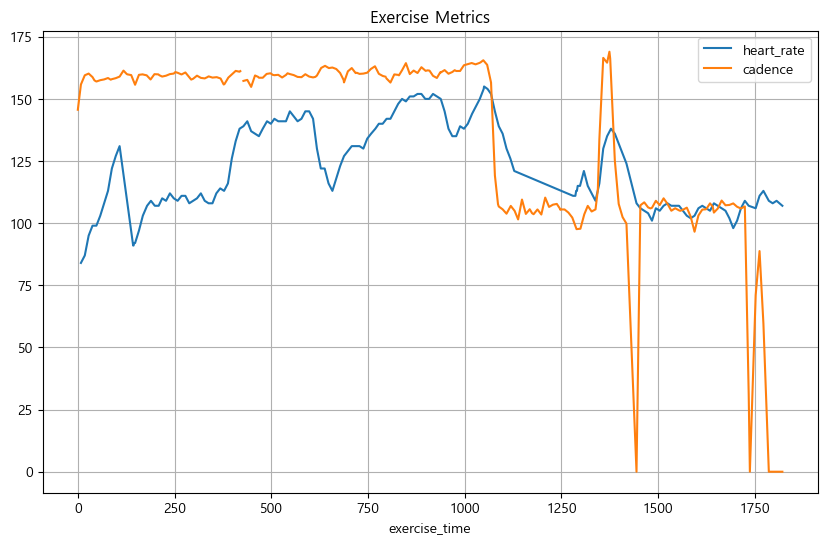

In [151]:

# exercise_time에 따른 heart_rate, cadence, distance, speed의 변화를 꺾은선 그래프로 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# exercise_time을 x축으로 설정
ax.set_xlabel('exercise_time')

# 각 변수에 대한 꺾은선 그래프 그리기
ax.plot(df_exercise['exercise_time'],
        df_exercise['heart_rate'], label='heart_rate')
ax.plot(df_exercise['exercise_time'],
        df_exercise['cadence'], label='cadence')

# 범례 추가
ax.legend()

# 그래프 제목 추가
ax.set_title('Exercise Metrics')
plt.grid(True)
# 그래프 보여주기
plt.show()


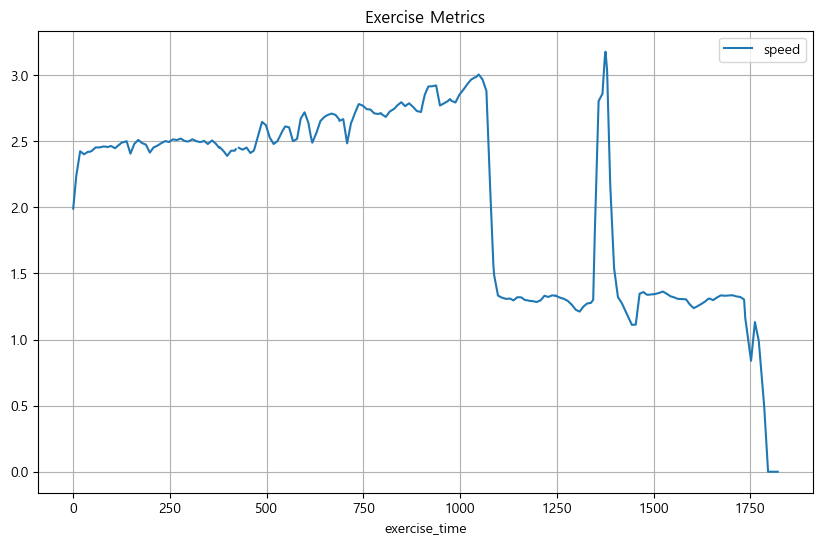

In [152]:

# exercise_time에 따른 heart_rate, cadence, distance, speed의 변화를 꺾은선 그래프로 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# exercise_time을 x축으로 설정
ax.set_xlabel('exercise_time')

# 각 변수에 대한 꺾은선 그래프 그리기

ax.plot(df_exercise['exercise_time'], df_exercise['speed'], label='speed')

# 범례 추가
ax.legend()

# 그래프 제목 추가
ax.set_title('Exercise Metrics')
plt.grid(True)
# 그래프 보여주기
plt.show()


- type2의 운동은 달리기로 기록된 운동으로 확인된다.

#### 피쳐 추가

In [153]:
# vo2_max는 체중당 유산소능력을 기록한 것으로 해당 값에 체중을 곱하여 실제 신체에서 처리 가능한 유산소 능력의 총량을 확인하고자 함.

df_merge['vo2_mul_weight']= df_merge['vo2_max'] * df_merge['weight']

C:\Users\ysj_1\AppData\Local\Temp\ipykernel_85056\3305483348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge['vo2_mul_weight']= df_merge['vo2_max'] * df_merge['weight']


C:\Users\ysj_1\AppData\Local\Temp\ipykernel_85056\291667384.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_num.corr()


<Figure size 1500x1500 with 0 Axes>

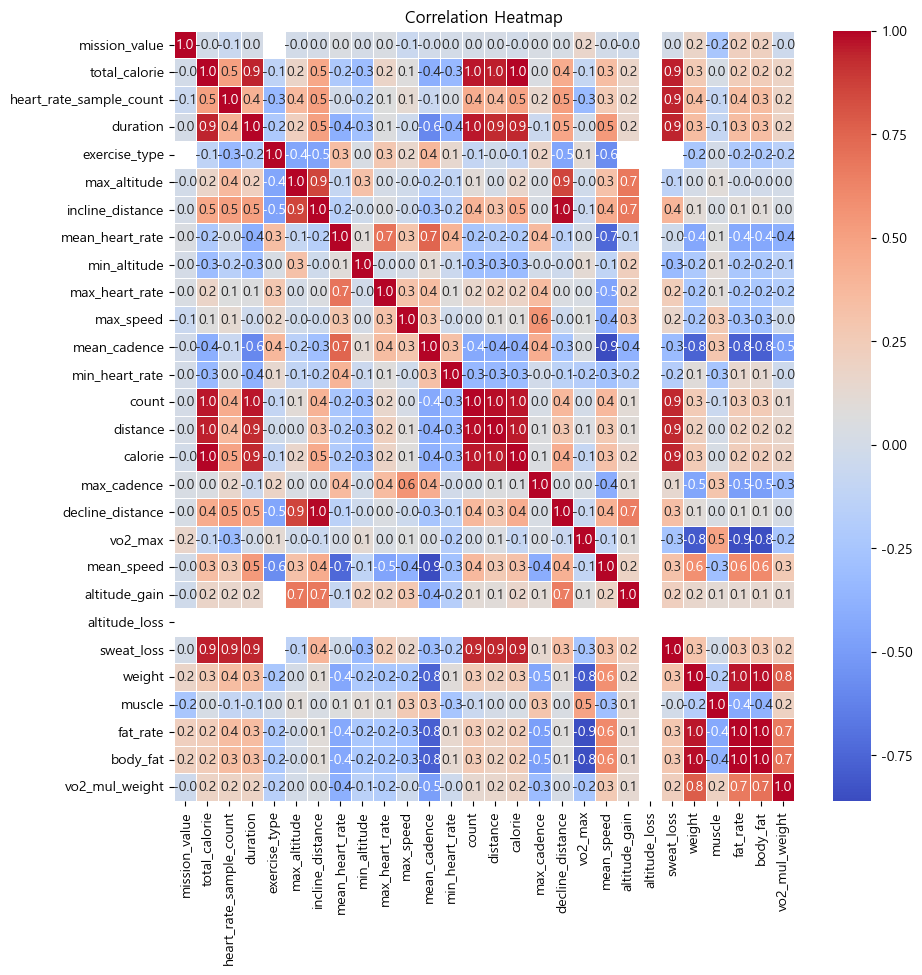

<Figure size 1500x1500 with 0 Axes>

In [154]:
df_num = df_merge.loc[:,df_merge.dtypes != object]
# 데이터프레임 df_num의 상관관계를 구한다.
corr = df_num.corr()

# 상관관계를 시각화하기 위해 히트맵을 그린다.
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.1f', linewidths=.5)

# 그래프의 제목을 설정한다.
plt.title('Correlation Heatmap')

# 그래프의 크기를 15,15로 설정한다.
plt.figure(figsize=(15,15))

#### 최대 평균속도의 운동 데이터 분석

In [155]:
df_merge_extype2[df_merge_extype2['mean_speed'] == df_merge_extype2['mean_speed'].min()].get('datauuid').to_list()[0]

'a83685e4-458f-4b61-af69-2eb9712efc07'

- 속도를 페이스기준으로 변환했기 때문에 숫자가 낮을수록 더 평균속도가 빠르다.

In [156]:
df_merge_extype2[df_merge_extype2['mean_speed'] == df_merge_extype2['mean_speed'].min()].get('mean_speed')

3865    4.422929
Name: mean_speed, dtype: float64

In [157]:

# json 파일 경로
path = './samsunghealth_821055484341_20230421142606/jsons/com.samsung.shealth.exercise/'
id = df_merge_extype2[df_merge_extype2['mean_speed'] == df_merge_extype2['mean_speed'].min()].get('datauuid').to_list()[0]
exercise_path = '.com.samsung.health.exercise.live_data.json'
# json 파일 열기
with open(path+id+exercise_path, 'r') as f:
    # json 파일 읽기
    data_exerise = json.load(f)

df_exercise = pd.DataFrame(data_exerise)

df_exercise['exercise_time'] = (df_exercise['start_time']/1000).astype('int')- (df_exercise['start_time']/1000).astype('int').min()

df_exercise

heart_rate     start_time  percent_of_vo2max  cadence   distance  speed  \
0          125.0  1679184044559                NaN      NaN        NaN    NaN   
1          124.0  1679184045559                NaN      NaN        NaN    NaN   
2          124.0  1679184046559                NaN      NaN        NaN    NaN   
3          123.0  1679184047559                NaN      NaN        NaN    NaN   
4          123.0  1679184048559                NaN      NaN        NaN    NaN   
...          ...            ...                ...      ...        ...    ...   
3073         NaN  1679186674403                NaN      NaN   4.954102    NaN   
3074         NaN  1679186683405                NaN    127.0  17.012695  1.530   
3075         NaN  1679186691404                NaN    112.0  14.513672  1.512   
3076         NaN  1679186693404                NaN    113.0   2.944336  1.513   
3077         NaN  1679186693404                NaN    113.0   0.000000  1.513   

      exercise_time  
0                10  
1                11  
2                12  
3                13  
4                14  
...             ...  
3073           2640  
3074           2649  
3075           2657  
3076           2659  
3077           2659  

[3078 rows x 7 columns]

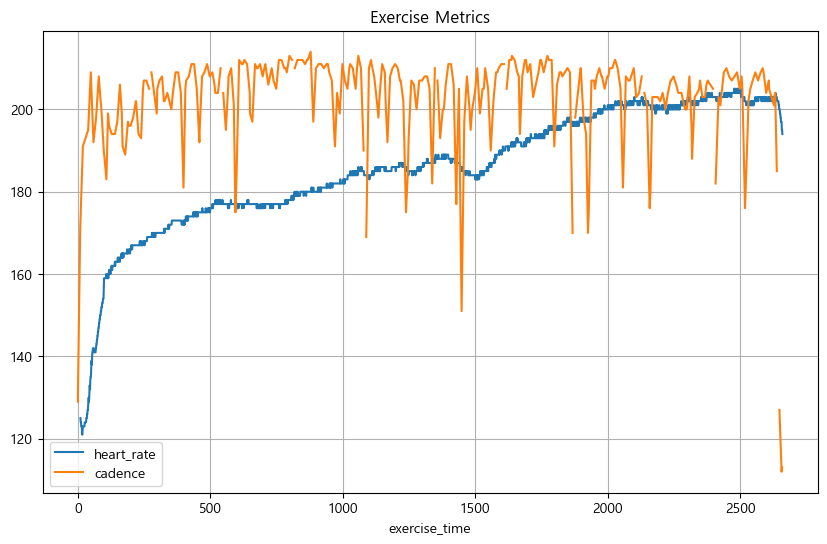

In [158]:

# exercise_time에 따른 heart_rate, cadence, distance, speed의 변화를 꺾은선 그래프로 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# exercise_time을 x축으로 설정
ax.set_xlabel('exercise_time')

# 각 변수에 대한 꺾은선 그래프 그리기
ax.plot(df_exercise['exercise_time'],
        df_exercise['heart_rate'], label='heart_rate')
ax.plot(df_exercise['exercise_time'],
        df_exercise['cadence'], label='cadence')

# 범례 추가
ax.legend()

# 그래프 제목 추가
ax.set_title('Exercise Metrics')
plt.grid(True)
# 그래프 보여주기
plt.show()


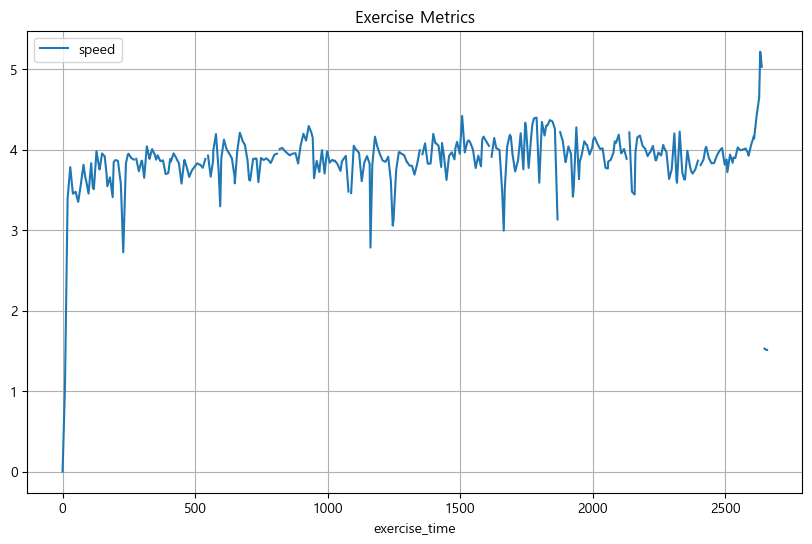

In [159]:

# exercise_time에 따른 heart_rate, cadence, distance, speed의 변화를 꺾은선 그래프로 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# exercise_time을 x축으로 설정
ax.set_xlabel('exercise_time')

# 각 변수에 대한 꺾은선 그래프 그리기

ax.plot(df_exercise['exercise_time'], df_exercise['speed'], label='speed')

# 범례 추가
ax.legend()

# 그래프 제목 추가
ax.set_title('Exercise Metrics')
plt.grid(True)
# 그래프 보여주기
plt.show()


<AxesSubplot: >

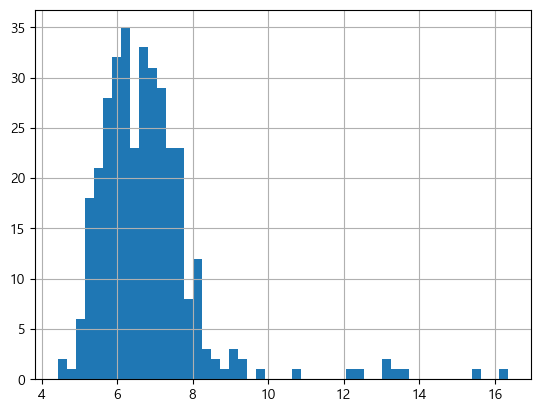

In [160]:
df_merge['mean_speed'].hist(bins=50)

- 달리기의 데이터 분석을 위해 7분페이스 미만의 속도인 경우에만 분석을 진행

In [161]:
df_merge_run = df_merge[df_merge['mean_speed'] <= 7.0]

C:\Users\ysj_1\AppData\Local\Temp\ipykernel_85056\585613261.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_num.corr()


<Figure size 1500x1500 with 0 Axes>

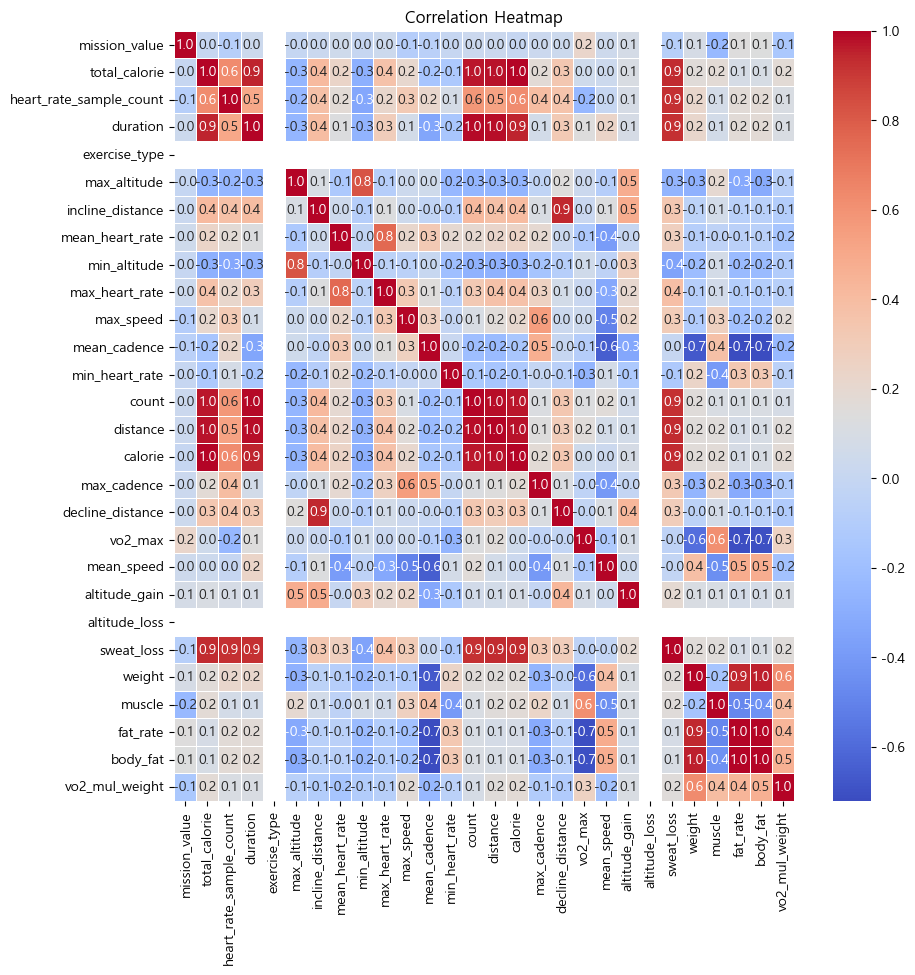

<Figure size 1500x1500 with 0 Axes>

In [162]:

df_num = df_merge_run.loc[:,df_merge_run.dtypes != object]
# 데이터프레임 df_num의 상관관계를 구한다.
corr = df_num.corr()

# 상관관계를 시각화하기 위해 히트맵을 그린다.
# cmap은 색상 맵을 설정한다.
# annot은 각 셀에 값을 표시할지 여부를 결정한다.
# fmt는 값의 표시 형식을 설정한다.
# linewidths는 셀 사이의 간격을 설정한다.
# 그래프의 크기를 15,15로 설정한다.
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.1f', linewidths=.5)

# 그래프의 제목을 설정한다.
plt.title('Correlation Heatmap')

# 그래프의 크기를 15,15로 설정한다.
plt.figure(figsize=(15,15))

In [163]:
df_merge_run.columns

Index(['date', 'mission_value', 'total_calorie', 'sensing_status',
       'heart_rate_sample_count', 'location_data_internal',
       'additional_internal', 'duration', 'location_data', 'start_time',
       'exercise_type', 'max_altitude', 'incline_distance', 'mean_heart_rate',
       'min_altitude', 'max_heart_rate', 'max_speed', 'mean_cadence',
       'min_heart_rate', 'count', 'distance', 'calorie', 'max_cadence',
       'decline_distance', 'vo2_max', 'deviceuuid', 'live_data', 'mean_speed',
       'altitude_gain', 'altitude_loss', 'end_time', 'datauuid', 'sweat_loss',
       'weight', 'muscle', 'fat_rate', 'body_fat', 'vo2_mul_weight'],
      dtype='object')

#### 달리기 데이터를 통한 EDA

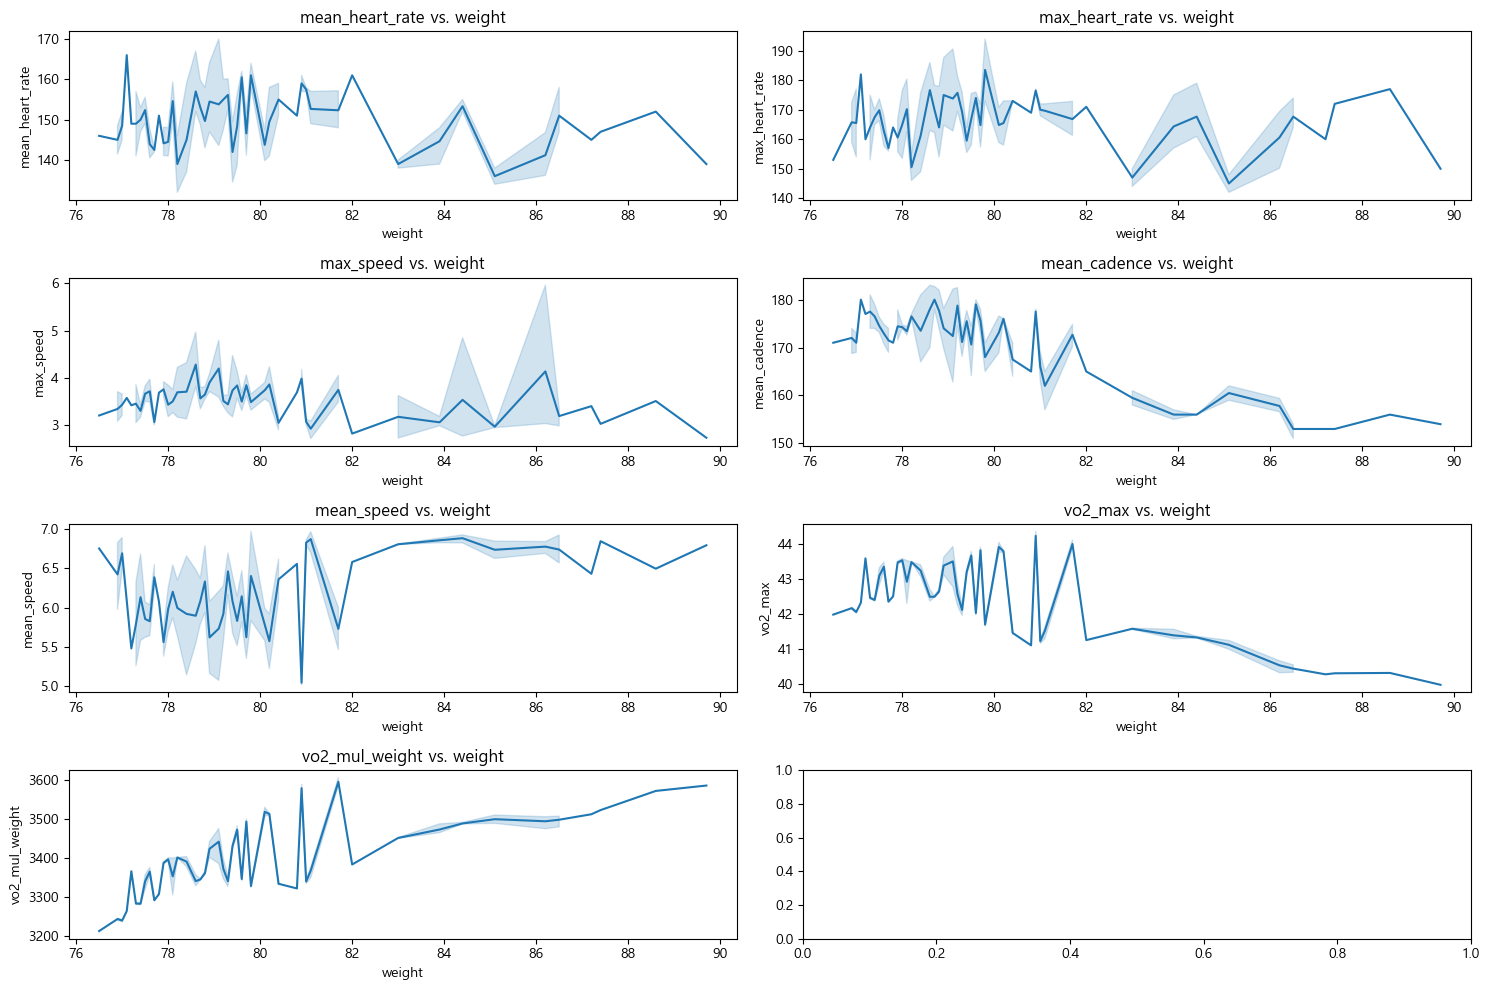

In [164]:

# subplot 생성
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))

# 첫 번째 subplot: weight에 따른 'mean_heart_rate'의 변화
sns.lineplot(x='weight', y='mean_heart_rate', data=df_merge_run, ax=axes[0, 0])
axes[0, 0].set_title('mean_heart_rate vs. weight')

# 두 번째 subplot: weight에 따른 'max_heart_rate'의 변화
sns.lineplot(x='weight', y='max_heart_rate', data=df_merge_run, ax=axes[0, 1])
axes[0, 1].set_title('max_heart_rate vs. weight')

# 세 번째 subplot: weight에 따른 'max_speed'의 변화
sns.lineplot(x='weight', y='max_speed', data=df_merge_run, ax=axes[1, 0])
axes[1, 0].set_title('max_speed vs. weight')

# 네 번째 subplot: weight에 따른 'mean_cadence'의 변화
sns.lineplot(x='weight', y='mean_cadence', data=df_merge_run, ax=axes[1, 1])
axes[1, 1].set_title('mean_cadence vs. weight')

# 다섯 번째 subplot: weight에 따른 'mean_speed'의 변화
sns.lineplot(x='weight', y='mean_speed', data=df_merge_run, ax=axes[2, 0])
axes[2, 0].set_title('mean_speed vs. weight')

# 여섯 번째 subplot: weight에 따른 'vo2_max'의 변화
sns.lineplot(x='weight', y='vo2_max', data=df_merge_run, ax=axes[2, 1])
axes[2, 1].set_title('vo2_max vs. weight')

# 일곱 번째 subplot: weight에 따른 'vo2_mul_weight'의 변화
sns.lineplot(x='weight', y='vo2_mul_weight', data=df_merge_run, ax=axes[3, 0])
axes[3, 0].set_title('vo2_mul_weight vs. weight')

# subplot 간의 간격 조정
plt.tight_layout()

# 차트 출력
plt.show()


- 체중의 변화에 따른 특이점은 많이 보이지 않는다. vo2_max의 경우는 체중의 감소에 따라 선형으로 증가하다가 82~76kg의 몸무게에서 크게 요동치는데 이는 이 무렵부터 마라톤을 위한 체력증진 운동을 한 것의 영향으로 보인다.

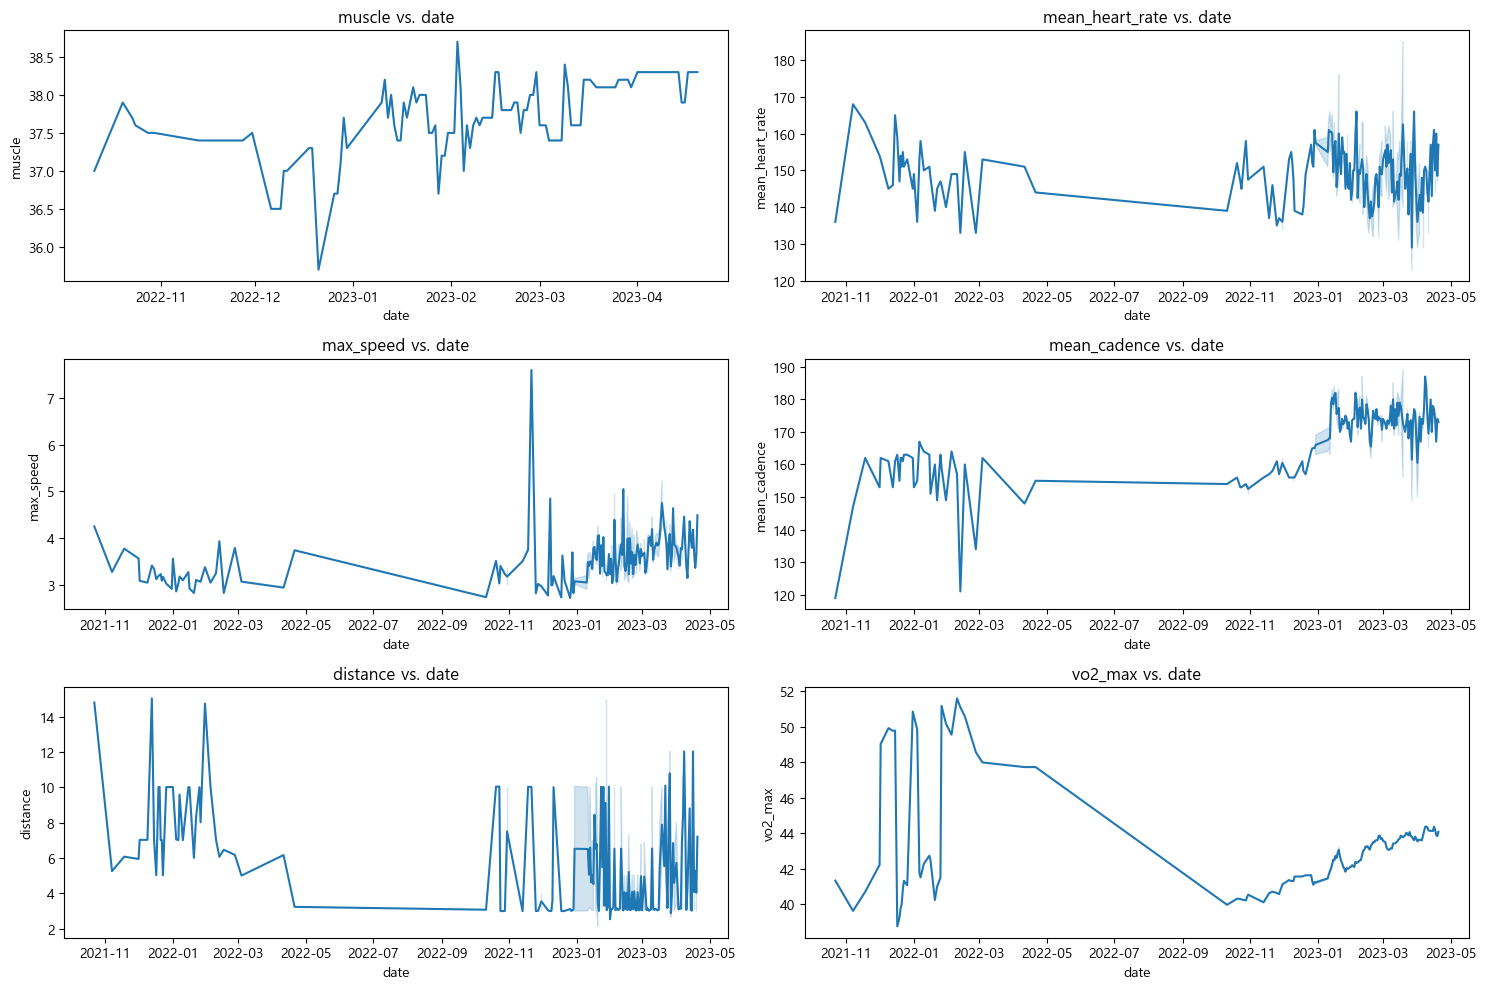

In [165]:

# subplot 생성
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# 첫 번째 subplot: date에 따른 'muscle'의 변화
sns.lineplot(x='date', y='muscle', data=df_merge_run, ax=axes[0, 0])
axes[0, 0].set_title('muscle vs. date')

# 두 번째 subplot: date에 따른 'mean_heart_rate'의 변화
sns.lineplot(x='date', y='mean_heart_rate', data=df_merge_run, ax=axes[0, 1])
axes[0, 1].set_title('mean_heart_rate vs. date')

# 세 번째 subplot: date에 따른 'max_speed'의 변화
sns.lineplot(x='date', y='max_speed', data=df_merge_run, ax=axes[1, 0])
axes[1, 0].set_title('max_speed vs. date')

# 네 번째 subplot: date에 따른 'mean_cadence'의 변화
sns.lineplot(x='date', y='mean_cadence', data=df_merge_run, ax=axes[1, 1])
axes[1, 1].set_title('mean_cadence vs. date')

# 다섯 번째 subplot: date에 따른 'distance'의 변화
sns.lineplot(x='date', y='distance', data=df_merge_run, ax=axes[2, 0])
axes[2, 0].set_title('distance vs. date')

# 여섯 번째 subplot: date에 따른 'vo2_max'의 변화
sns.lineplot(x='date', y='vo2_max', data=df_merge_run, ax=axes[2, 1])
axes[2, 1].set_title('vo2_max vs. date')

# subplot 간의 간격 조정
plt.tight_layout()

# 차트 출력
plt.show()


<AxesSubplot: >

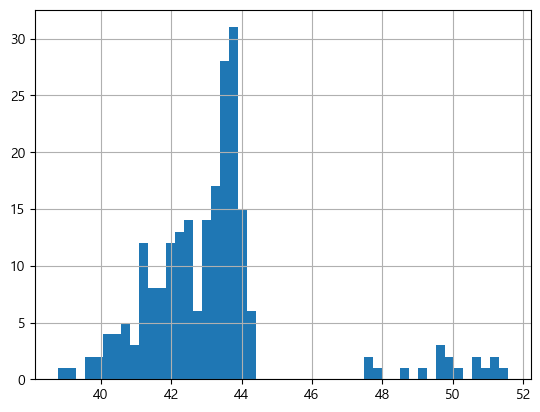

In [166]:
df_merge_run['vo2_max'].hist(bins=50)

- vo2_max가 46이상인 경우는 이상치로 보임 해당시기의 유산소능력은 지금보다 객관적으로 떨어지는데 해당 수치가 높은 것은 측정상의 오류로 판단됨.

In [167]:
df_merge_run = df_merge_run[df_merge_run['vo2_max'] < 46].copy()

- 다시 확인해보자

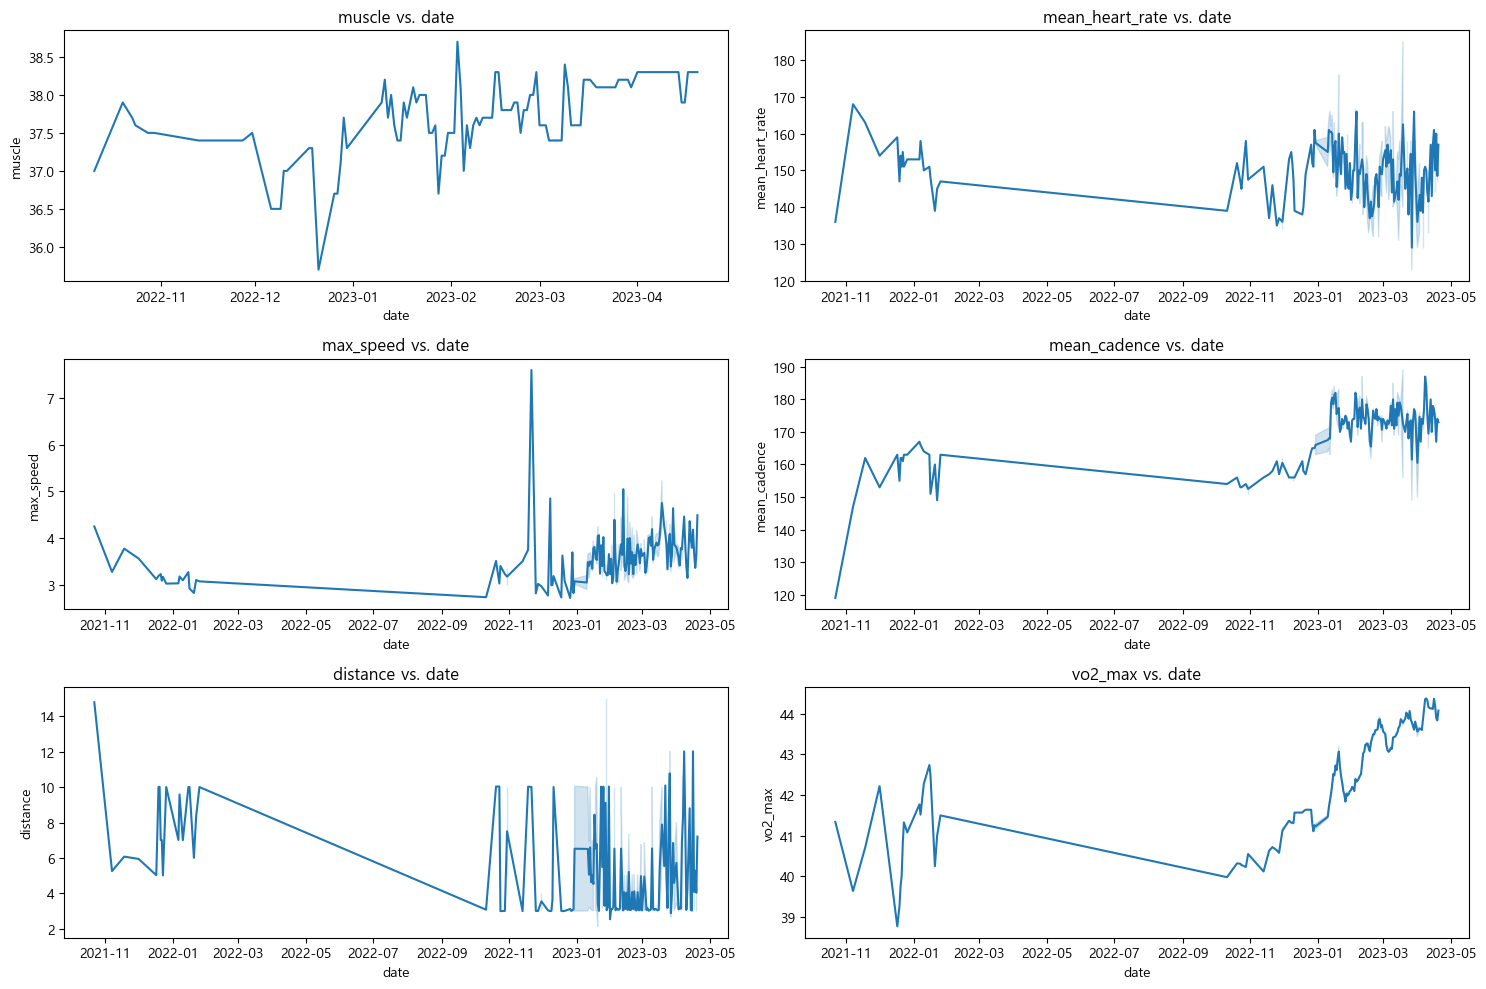

In [168]:
# subplot 생성
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# 첫 번째 subplot: date에 따른 'muscle'의 변화
sns.lineplot(x='date', y='muscle', data=df_merge_run, ax=axes[0, 0])
axes[0, 0].set_title('muscle vs. date')

# 두 번째 subplot: date에 따른 'mean_heart_rate'의 변화
sns.lineplot(x='date', y='mean_heart_rate', data=df_merge_run, ax=axes[0, 1])
axes[0, 1].set_title('mean_heart_rate vs. date')

# 세 번째 subplot: date에 따른 'max_speed'의 변화
sns.lineplot(x='date', y='max_speed', data=df_merge_run, ax=axes[1, 0])
axes[1, 0].set_title('max_speed vs. date')

# 네 번째 subplot: date에 따른 'mean_cadence'의 변화
sns.lineplot(x='date', y='mean_cadence', data=df_merge_run, ax=axes[1, 1])
axes[1, 1].set_title('mean_cadence vs. date')

# 다섯 번째 subplot: date에 따른 'distance'의 변화
sns.lineplot(x='date', y='distance', data=df_merge_run, ax=axes[2, 0])
axes[2, 0].set_title('distance vs. date')

# 여섯 번째 subplot: date에 따른 'vo2_max'의 변화
sns.lineplot(x='date', y='vo2_max', data=df_merge_run, ax=axes[2, 1])
axes[2, 1].set_title('vo2_max vs. date')

# subplot 간의 간격 조정
plt.tight_layout()

# 차트 출력
plt.show()

- 2021년 연말연시 당시 다이어트를 할 시기의 데이터와 2022년 새로 다이어트를 시작한 당시의 vo2_max값의 시간에 따른 결측치가 많이 존재하며 그 사이 유산소 능력도 감소했음을 확인할 수 있다.
- 결측이 너무 많은 시기는 제외하고 분석하기로 하자

In [169]:
df_merge_run = df_merge_run[df_merge_run['date'] > '20220901']

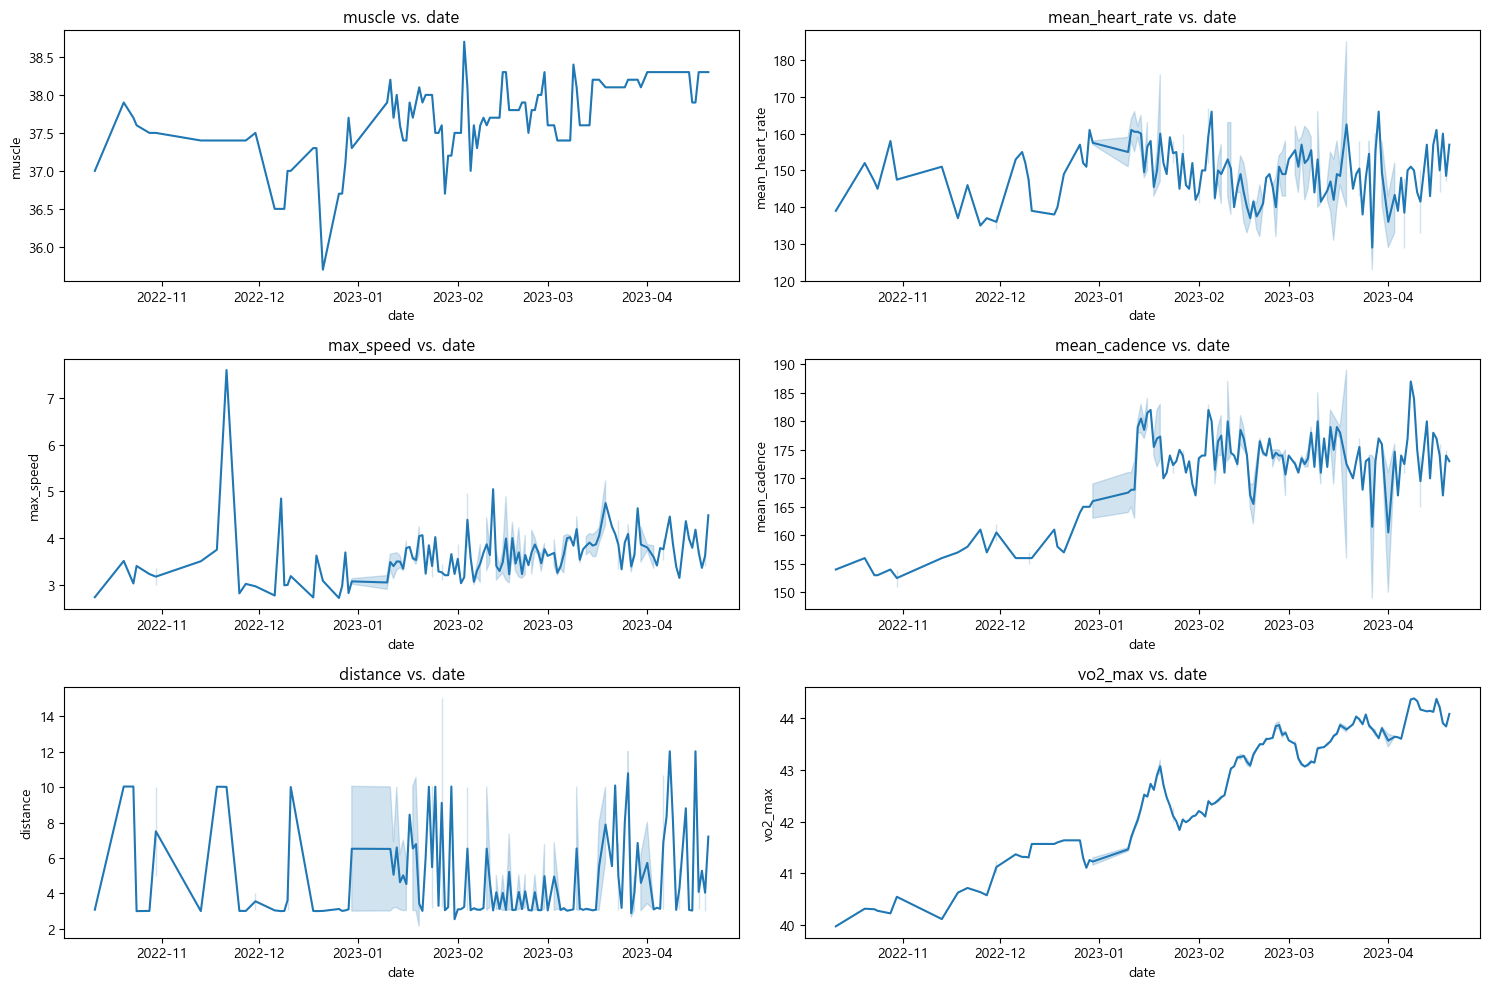

In [170]:
# subplot 생성
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# 첫 번째 subplot: date에 따른 'muscle'의 변화
sns.lineplot(x='date', y='muscle', data=df_merge_run, ax=axes[0, 0])
axes[0, 0].set_title('muscle vs. date')

# 두 번째 subplot: date에 따른 'mean_heart_rate'의 변화
sns.lineplot(x='date', y='mean_heart_rate', data=df_merge_run, ax=axes[0, 1])
axes[0, 1].set_title('mean_heart_rate vs. date')

# 세 번째 subplot: date에 따른 'max_speed'의 변화
sns.lineplot(x='date', y='max_speed', data=df_merge_run, ax=axes[1, 0])
axes[1, 0].set_title('max_speed vs. date')

# 네 번째 subplot: date에 따른 'mean_cadence'의 변화
sns.lineplot(x='date', y='mean_cadence', data=df_merge_run, ax=axes[1, 1])
axes[1, 1].set_title('mean_cadence vs. date')

# 다섯 번째 subplot: date에 따른 'distance'의 변화
sns.lineplot(x='date', y='distance', data=df_merge_run, ax=axes[2, 0])
axes[2, 0].set_title('distance vs. date')

# 여섯 번째 subplot: date에 따른 'vo2_max'의 변화
sns.lineplot(x='date', y='vo2_max', data=df_merge_run, ax=axes[2, 1])
axes[2, 1].set_title('vo2_max vs. date')

# subplot 간의 간격 조정
plt.tight_layout()

# 차트 출력
plt.show()

- 다이어트에 본격적으로 들어간 시기부터 달리기 비중을 늘린 것이 cadence값의 증가로 이어진 것으로 보인다.

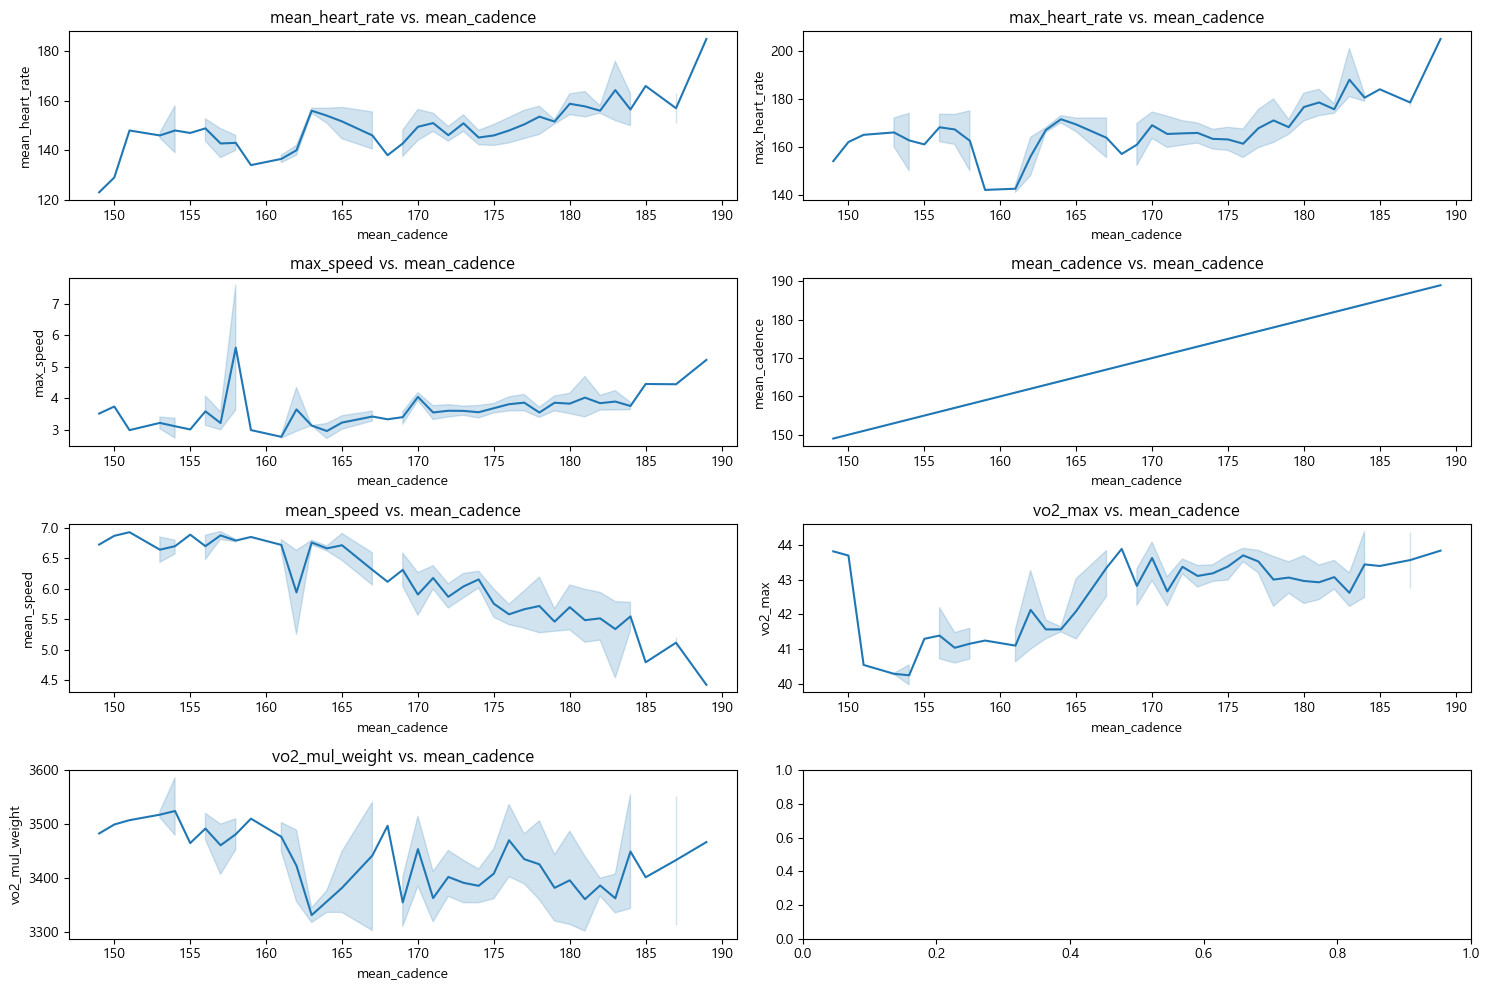

In [171]:

# subplot 생성
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))

# 첫 번째 subplot: mean_cadence에 따른 'mean_heart_rate'의 변화
sns.lineplot(x='mean_cadence', y='mean_heart_rate', data=df_merge_run, ax=axes[0, 0])
axes[0, 0].set_title('mean_heart_rate vs. mean_cadence')

# 두 번째 subplot: mean_cadence에 따른 'max_heart_rate'의 변화
sns.lineplot(x='mean_cadence', y='max_heart_rate', data=df_merge_run, ax=axes[0, 1])
axes[0, 1].set_title('max_heart_rate vs. mean_cadence')

# 세 번째 subplot: mean_cadence에 따른 'max_speed'의 변화
sns.lineplot(x='mean_cadence', y='max_speed', data=df_merge_run, ax=axes[1, 0])
axes[1, 0].set_title('max_speed vs. mean_cadence')

# 네 번째 subplot: mean_cadence에 따른 'mean_cadence'의 변화
sns.lineplot(x='mean_cadence', y='mean_cadence', data=df_merge_run, ax=axes[1, 1])
axes[1, 1].set_title('mean_cadence vs. mean_cadence')

# 다섯 번째 subplot: mean_cadence에 따른 'mean_speed'의 변화
sns.lineplot(x='mean_cadence', y='mean_speed', data=df_merge_run, ax=axes[2, 0])
axes[2, 0].set_title('mean_speed vs. mean_cadence')

# 여섯 번째 subplot: mean_cadence에 따른 'vo2_max'의 변화
sns.lineplot(x='mean_cadence', y='vo2_max', data=df_merge_run, ax=axes[2, 1])
axes[2, 1].set_title('vo2_max vs. mean_cadence')

# 일곱 번째 subplot: mean_cadence에 따른 'vo2_mul_weight'의 변화
sns.lineplot(x='mean_cadence', y='vo2_mul_weight', data=df_merge_run, ax=axes[3, 0])
axes[3, 0].set_title('vo2_mul_weight vs. mean_cadence')

# subplot 간의 간격 조정
plt.tight_layout()

# 차트 출력
plt.show()


- cadence와 vo2_max의 증가는 상관관계를 보인다.

#### cadencd 보폭수와 함께 달리기 속도에 큰 영향을 준다는 stride값을 추가해보자.

In [172]:
df_merge_run['mean_stride'] = df_merge_run['mean_speed']/df_merge_run['mean_cadence']
df_merge_run = df_merge_run.copy()

In [173]:
df_merge_run

date  mission_value  total_calorie  \
2985 2022-10-11        10000.0      272.70360   
3033 2022-10-20        10000.0      943.06220   
3051 2022-10-23        10000.0      934.73220   
3060 2022-10-24        10000.0      270.27753   
3084 2022-10-28        10000.0      260.70764   
...         ...            ...            ...   
3991 2023-04-17        12000.0      327.81323   
3993 2023-04-18        12000.0      499.86670   
3996 2023-04-19        12000.0      290.67743   
3998 2023-04-19        12000.0      466.69226   
4000 2023-04-20            8.0      670.81366   

                                         sensing_status  \
2985  c650a310-57d2-4a6d-9cdd-e9e24eff3948.sensing_s...   
3033  d4247486-bec1-435e-a974-3e1614ac30cf.sensing_s...   
3051  dc6bec9f-fa9d-4e10-83c7-87df17d64793.sensing_s...   
3060  e09b921a-c906-42f1-a74e-c57f75be9b24.sensing_s...   
3084  b6d7afa4-870c-42b9-be6b-64d78b72bf73.sensing_s...   
...                                                 ...   
3991  f00d3b7c-aae5-4ea9-8b94-5d4bb9aef4a2.sensing_s...   
3993  747e39ec-b2bd-4f00-bf22-7edb6ec085cc.sensing_s...   
3996  4b651196-f33d-4885-884e-060e4488c59b.sensing_s...   
3998  34337681-bd4a-4811-8caa-5f728b7887e3.sensing_s...   
4000  a5d8912b-6313-41b1-a6d1-056a6b6f37a1.sensing_s...   

      heart_rate_sample_count  \
2985                   1254.0   
3033                   3869.0   
3051                   4102.0   
3060                   1157.0   
3084                   1151.0   
...                       ...   
3991                   1103.0   
3993                   1969.0   
3996                   1040.0   
3998                   1641.0   
4000                   2264.0   

                                 location_data_internal  \
2985  c650a310-57d2-4a6d-9cdd-e9e24eff3948.location_...   
3033  d4247486-bec1-435e-a974-3e1614ac30cf.location_...   
3051  dc6bec9f-fa9d-4e10-83c7-87df17d64793.location_...   
3060  e09b921a-c906-42f1-a74e-c57f75be9b24.location_...   
3084  b6d7afa4-870c-42b9-be6b-64d78b72bf73.location_...   
...                                                 ...   
3991  f00d3b7c-aae5-4ea9-8b94-5d4bb9aef4a2.location_...   
3993  747e39ec-b2bd-4f00-bf22-7edb6ec085cc.location_...   
3996  4b651196-f33d-4885-884e-060e4488c59b.location_...   
3998  34337681-bd4a-4811-8caa-5f728b7887e3.location_...   
4000  a5d8912b-6313-41b1-a6d1-056a6b6f37a1.location_...   

                                    additional_internal  duration  \
2985  c650a310-57d2-4a6d-9cdd-e9e24eff3948.additiona...      21.0   
3033  d4247486-bec1-435e-a974-3e1614ac30cf.additiona...      65.0   
3051  dc6bec9f-fa9d-4e10-83c7-87df17d64793.additiona...      69.0   
3060  e09b921a-c906-42f1-a74e-c57f75be9b24.additiona...      19.0   
3084  b6d7afa4-870c-42b9-be6b-64d78b72bf73.additiona...      20.0   
...                                                 ...       ...   
3991  f00d3b7c-aae5-4ea9-8b94-5d4bb9aef4a2.additiona...      19.0   
3993  747e39ec-b2bd-4f00-bf22-7edb6ec085cc.additiona...      33.0   
3996  4b651196-f33d-4885-884e-060e4488c59b.additiona...      17.0   
3998  34337681-bd4a-4811-8caa-5f728b7887e3.additiona...      28.0   
4000  a5d8912b-6313-41b1-a6d1-056a6b6f37a1.additiona...      38.0   

                                          location_data           start_time  \
2985  c650a310-57d2-4a6d-9cdd-e9e24eff3948.com.samsu...  2022-10-11 21:01:09   
3033  d4247486-bec1-435e-a974-3e1614ac30cf.com.samsu...  2022-10-20 12:21:01   
3051  dc6bec9f-fa9d-4e10-83c7-87df17d64793.com.samsu...  2022-10-23 12:14:11   
3060  e09b921a-c906-42f1-a74e-c57f75be9b24.com.samsu...  2022-10-24 21:43:47   
3084  b6d7afa4-870c-42b9-be6b-64d78b72bf73.com.samsu...  2022-10-28 22:50:52   
...                                                 ...                  ...   
3991  f00d3b7c-aae5-4ea9-8b94-5d4bb9aef4a2.com.samsu...  2023-04-17 20:43:42   
3993  747e39ec-b2bd-4f00-bf22-7edb6ec085cc.com.samsu...  2023-04-18 11:05:55   
3996  4b651196-f33d-4885-884e-060e4488c59b.com.samsu...   

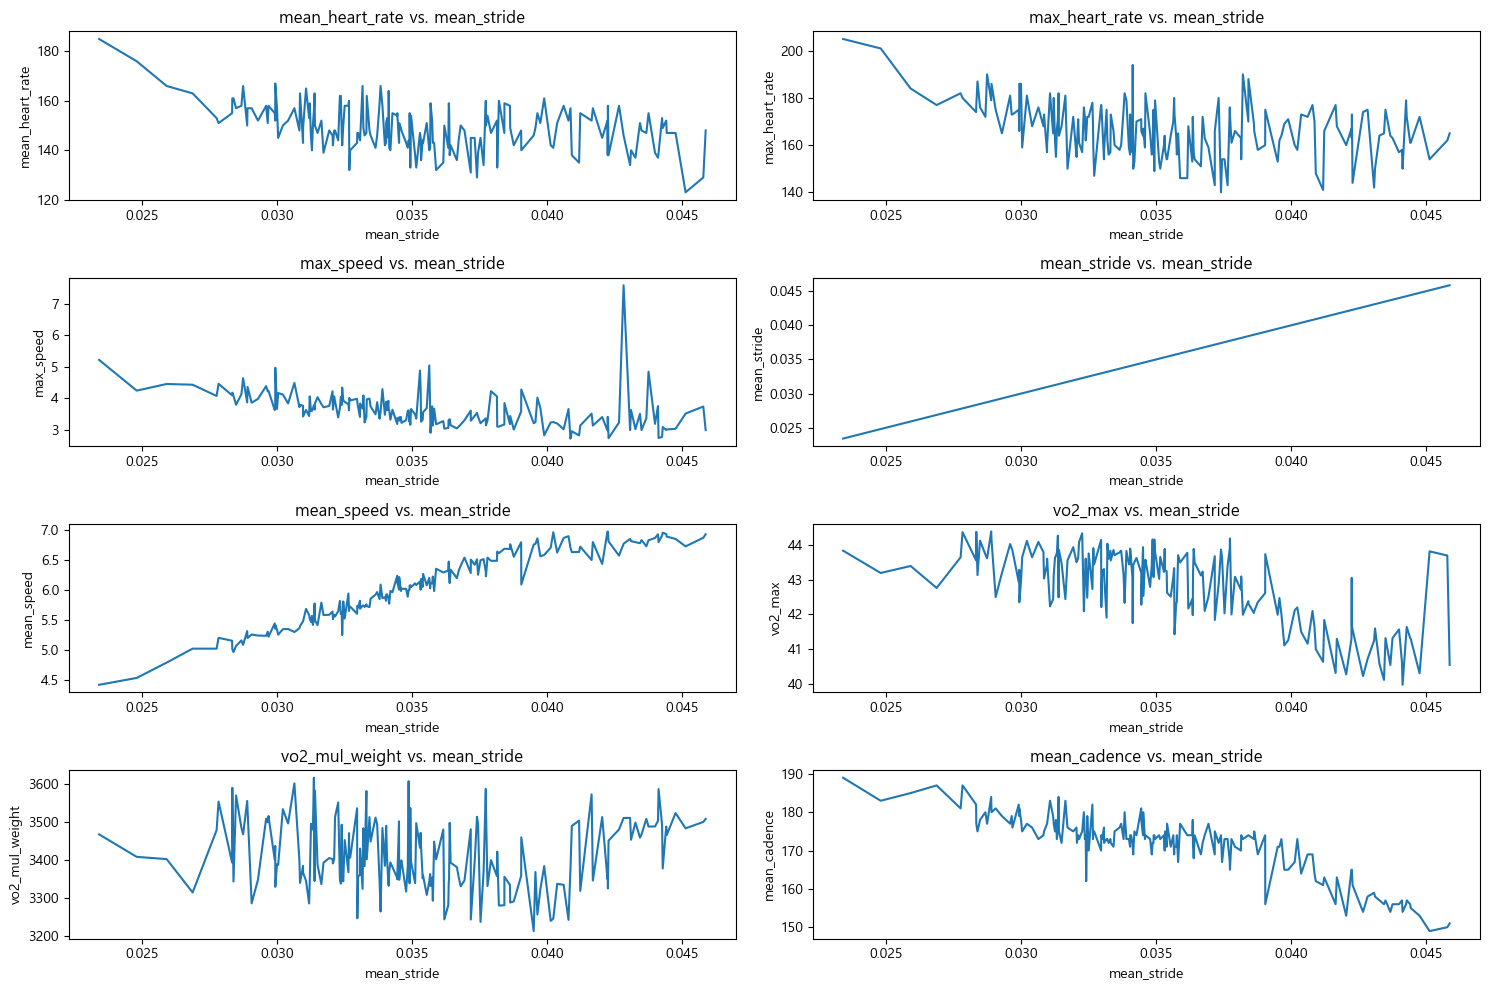

In [174]:

# subplot 생성
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))

# 첫 번째 subplot: mean_stride에 따른 'mean_heart_rate'의 변화
sns.lineplot(x='mean_stride', y='mean_heart_rate', data=df_merge_run, ax=axes[0, 0])
axes[0, 0].set_title('mean_heart_rate vs. mean_stride')

# 두 번째 subplot: mean_stride에 따른 'max_heart_rate'의 변화
sns.lineplot(x='mean_stride', y='max_heart_rate', data=df_merge_run, ax=axes[0, 1])
axes[0, 1].set_title('max_heart_rate vs. mean_stride')

# 세 번째 subplot: mean_stride에 따른 'max_speed'의 변화
sns.lineplot(x='mean_stride', y='max_speed', data=df_merge_run, ax=axes[1, 0])
axes[1, 0].set_title('max_speed vs. mean_stride')

# 네 번째 subplot: mean_stride에 따른 'mean_stride'의 변화
sns.lineplot(x='mean_stride', y='mean_stride', data=df_merge_run, ax=axes[1, 1])
axes[1, 1].set_title('mean_stride vs. mean_stride')

# 다섯 번째 subplot: mean_stride에 따른 'mean_speed'의 변화
sns.lineplot(x='mean_stride', y='mean_speed', data=df_merge_run, ax=axes[2, 0])
axes[2, 0].set_title('mean_speed vs. mean_stride')

# 여섯 번째 subplot: mean_stride에 따른 'vo2_max'의 변화
sns.lineplot(x='mean_stride', y='vo2_max', data=df_merge_run, ax=axes[2, 1])
axes[2, 1].set_title('vo2_max vs. mean_stride')

# 일곱 번째 subplot: mean_stride에 따른 'vo2_mul_weight'의 변화
sns.lineplot(x='mean_stride', y='vo2_mul_weight', data=df_merge_run, ax=axes[3, 0])
axes[3, 0].set_title('vo2_mul_weight vs. mean_stride')

# 여덟 번째 subplot: mean_stride에 따른 'mean_cadence'의 변화
sns.lineplot(x='mean_stride', y='mean_cadence', data=df_merge_run, ax=axes[3, 1])
axes[3, 1].set_title('mean_cadence vs. mean_stride')

# subplot 간의 간격 조정
plt.tight_layout()

# 차트 출력
plt.show()


C:\Users\ysj_1\AppData\Local\Temp\ipykernel_85056\1012393361.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mean_stride.sort_values(by='date',inplace=True)


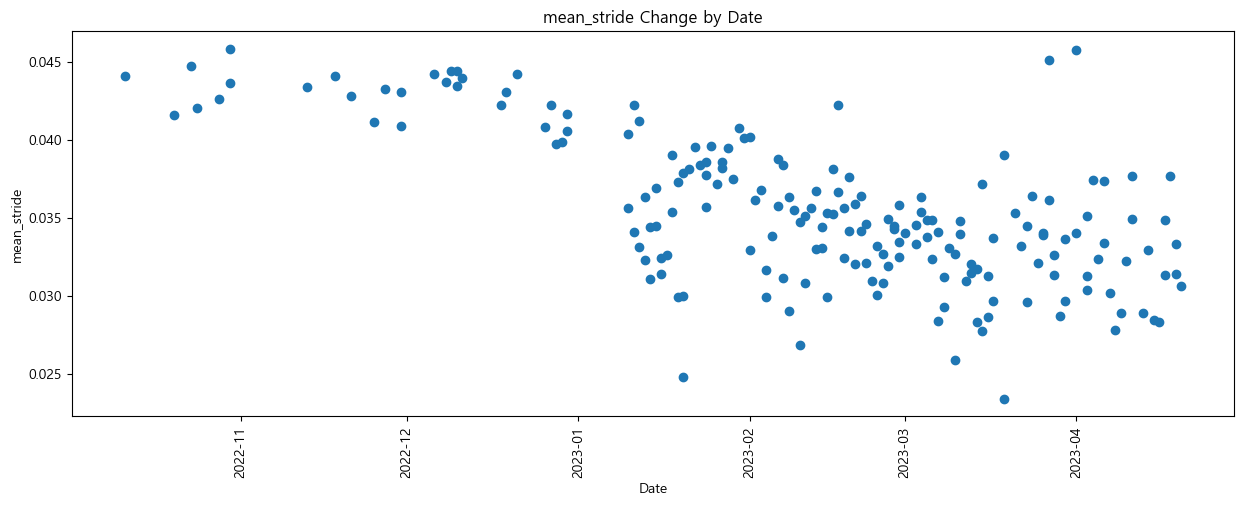

In [175]:
# mean_stride 입력 정보를 통해 분석

df_merge_run_mean_stride = df_merge_run[df_merge_run['mean_stride'].notnull()]

# date와 mean_stride 열만 추출하여 새로운 데이터프레임 생성
df_mean_stride = df_merge_run_mean_stride[['date', 'mean_stride']]

df_mean_stride.sort_values(by='date',inplace=True)

# date를 인덱스로 설정
df_mean_stride.set_index('date', inplace=True)
df_mean_stride = df_mean_stride.loc['20220501':,:]

# 그래프 크기 설정
plt.figure(figsize=(15, 5))

# 그래프 그리기 (점 그래프)
plt.plot(df_mean_stride, marker='o', linestyle='')

# 그래프 타이틀, x축, y축 라벨 설정
plt.title('mean_stride Change by Date')
plt.xlabel('Date')
plt.ylabel('mean_stride')

# x축 라벨 90도 회전
plt.xticks(rotation=90)

# 그래프 출력
plt.show()


- cadence 보폭수 와 stride 보폭넓이는 보통 음의 상관관계를 가지기 때문에 vo2_max값과 stride의 관계도 음의 상관관계를 나타내는 것으로 나온다.

C:\Users\ysj_1\AppData\Local\Temp\ipykernel_85056\585613261.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_num.corr()


<Figure size 1500x1500 with 0 Axes>

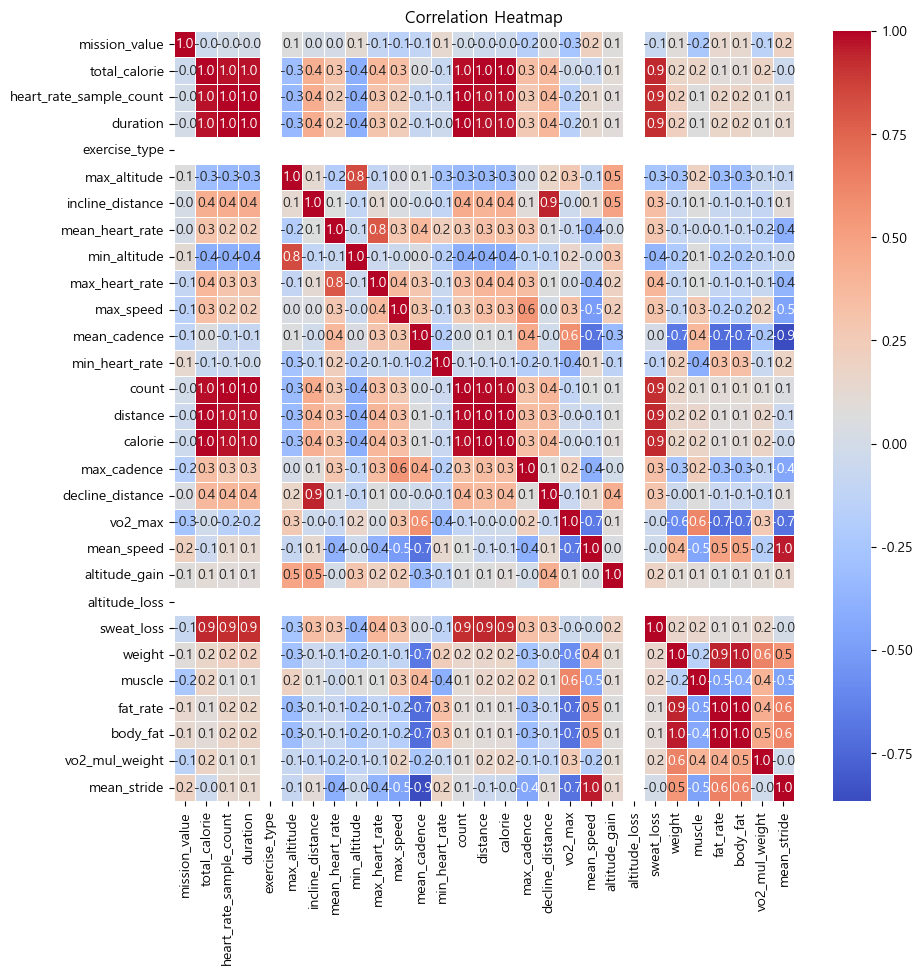

<Figure size 1500x1500 with 0 Axes>

In [176]:

df_num = df_merge_run.loc[:,df_merge_run.dtypes != object]
# 데이터프레임 df_num의 상관관계를 구한다.
corr = df_num.corr()

# 상관관계를 시각화하기 위해 히트맵을 그린다.
# cmap은 색상 맵을 설정한다.
# annot은 각 셀에 값을 표시할지 여부를 결정한다.
# fmt는 값의 표시 형식을 설정한다.
# linewidths는 셀 사이의 간격을 설정한다.
# 그래프의 크기를 15,15로 설정한다.
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.1f', linewidths=.5)

# 그래프의 제목을 설정한다.
plt.title('Correlation Heatmap')

# 그래프의 크기를 15,15로 설정한다.
plt.figure(figsize=(15,15))

---

## 머신러닝을 통해 target vo2를 달성하기 위해 몸무게 감소 추정치를 확인

In [178]:
df_merge_run['weight'].info()

<class 'pandas.core.series.Series'>
Int64Index: 187 entries, 2985 to 4000
Series name: weight
Non-Null Count  Dtype  
--------------  -----  
187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [179]:
df_train = df_merge_run[df_merge_run['weight'].notnull()]

In [180]:
df_train = df_train.loc[:,df_train.dtypes != object]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 2985 to 4000
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     187 non-null    datetime64[ns]
 1   mission_value            187 non-null    float64       
 2   total_calorie            187 non-null    float64       
 3   heart_rate_sample_count  187 non-null    float64       
 4   duration                 187 non-null    float64       
 5   exercise_type            187 non-null    int64         
 6   max_altitude             187 non-null    float64       
 7   incline_distance         179 non-null    float64       
 8   mean_heart_rate          187 non-null    float64       
 9   min_altitude             187 non-null    float64       
 10  max_heart_rate           187 non-null    float64       
 11  max_speed                187 non-null    float64       
 12  mean_cadence             187 non

In [181]:
df_train

date  mission_value  total_calorie  heart_rate_sample_count  \
2985 2022-10-11        10000.0      272.70360                   1254.0   
3033 2022-10-20        10000.0      943.06220                   3869.0   
3051 2022-10-23        10000.0      934.73220                   4102.0   
3060 2022-10-24        10000.0      270.27753                   1157.0   
3084 2022-10-28        10000.0      260.70764                   1151.0   
...         ...            ...            ...                      ...   
3991 2023-04-17        12000.0      327.81323                   1103.0   
3993 2023-04-18        12000.0      499.86670                   1969.0   
3996 2023-04-19        12000.0      290.67743                   1040.0   
3998 2023-04-19        12000.0      466.69226                   1641.0   
4000 2023-04-20            8.0      670.81366                   2264.0   

      duration  exercise_type  max_altitude  incline_distance  \
2985      21.0           1002        -3.897            22.504   
3033      65.0           1002         0.793           286.854   
3051      69.0           1002        -4.711           164.563   
3060      19.0           1002         3.462            68.092   
3084      20.0           1002        -0.621             2.307   
...        ...            ...           ...               ...   
3991      19.0           1002        18.840            70.376   
3993      33.0           1002        25.154             7.093   
3996      17.0           1002        19.199            70.680   
3998      28.0           1002        13.337           121.462   
4000      38.0           1002         1.398           131.415   

      mean_heart_rate  min_altitude  ...  mean_speed  altitude_gain  \
2985            139.0        -6.965  ...    6.795513            NaN   
3033            152.0        -9.165  ...    6.496718            NaN   
3051            147.0       -14.566  ...    6.847694            NaN   
3060            145.0        -4.538  ...    6.431807            NaN   
3084            158.0        -6.436  ...    6.569993            NaN   
...               ...           ...  ...         ...            ...   
3991            144.0         4.820  ...    5.997174         43.097   
3993            160.0        10.778  ...    6.300266         53.813   
3996            147.0         4.969  ...    5.761477         10.054   
3998            150.0        -0.401  ...    5.494444         25.615   
4000            157.0       -10.357  ...    5.300000         30.793   

      altitude_loss  sweat_loss  weight  muscle  fat_rate  body_fat  \
2985            NaN       264.0    89.7    37.0      27.0      24.2   
3033            NaN      1030.0    88.6    37.9      24.4      21.6   
3051            NaN       954.0    87.4    37.7      23.8      20.8   
3060            NaN       263.0    87.2    37.6      23.9      20.8   
3084            NaN       228.0    86.5    37.5      23.0      19.9   
...             ...         ...     ...     ...       ...       ...   
3991            NaN       312.0    81.7    38.3      16.9      13.8   
3993            NaN       551.0    81.7    38.3      16.9      13.8   
3996            NaN       320.0    81.7    38.3      16.9      13.8   
3998            NaN       532.0    81.7    38.3      16.9      13.8   
4000            NaN       832.0    81.7    38.3      16.9      13.8   

      vo2_mul_weight  mean_stride  
2985        3586.206     0.044127  
3033        3572.352     0.041646  
3051        3523.094     0.044756  
3060        3512.416     0.042038  
3084        3479.895     0.042662  
...              ...          ...  
3991        3607.055     0.034867  
3993        3586.630     0.037726  
3996        3580.911     0.033303  
3998        3582.545     0.031397  
4000        3601.336     0.030636  

[187 rows x 30 columns]

In [182]:
df_train.columns

Index(['date', 'mission_value', 'total_calorie', 'heart_rate_sample_count',
       'duration', 'exercise_type', 'max_altitude', 'incline_distance',
       'mean_heart_rate', 'min_altitude', 'max_heart_rate', 'max_speed',
       'mean_cadence', 'min_heart_rate', 'count', 'distance', 'calorie',
       'max_cadence', 'decline_distance', 'vo2_max', 'mean_speed',
       'altitude_gain', 'altitude_loss', 'sweat_loss', 'weight', 'muscle',
       'fat_rate', 'body_fat', 'vo2_mul_weight', 'mean_stride'],
      dtype='object')

In [183]:
df_train_try = df_train[['distance','mean_speed','weight','muscle','body_fat','vo2_max']]
df_train_try

distance  mean_speed  weight  muscle  body_fat  vo2_max
2985      3.08    6.795513    89.7    37.0      24.2    39.98
3033     10.04    6.496718    88.6    37.9      21.6    40.32
3051     10.04    6.847694    87.4    37.7      20.8    40.31
3060      3.00    6.431807    87.2    37.6      20.8    40.28
3084      3.01    6.569993    86.5    37.5      19.9    40.23
...        ...         ...     ...     ...       ...      ...
3991      3.14    5.997174    81.7    38.3      13.8    44.15
3993      5.28    6.300266    81.7    38.3      13.8    43.90
3996      3.02    5.761477    81.7    38.3      13.8    43.83
3998      5.06    5.494444    81.7    38.3      13.8    43.85
4000      7.21    5.300000    81.7    38.3      13.8    44.08

[187 rows x 6 columns]

In [192]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV,train_test_split
import xgboost as xgb


# 예측 변수와 설명 변수를 분리
X_train = df_train_try.drop('vo2_max', axis=1)  # 설명 변수
y_train = df_train_try['vo2_max']  # 예측 변수

# xgboost 모델 생성
xgb_model = xgb.XGBRegressor()

# 탐색할 하이퍼파라미터 범위 설정
param_grid = {'n_estimators': [100, 500, 1000],  # 트리 개수
              'learning_rate': [0.01, 0.05, 0.1],  # 학습률
              'max_depth': [3, 5, 7]}  # 트리 깊이

# GridSearchCV를 이용한 최적 하이퍼파라미터 탐색
grid_search = GridSearchCV(xgb_model, param_grid,
                           cv=5, scoring='neg_mean_squared_error')  # 5-fold cross validation
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print(grid_search.best_params_)


{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 500}


In [193]:
# 예측 변수와 설명 변수를 분리
X_train,X_test,y_train,y_test =train_test_split(df_train_try.drop('vo2_max', axis=1),df_train_try['vo2_max'],test_size=0.1,random_state=42)


In [194]:
grid_search.best_estimator_.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [212]:
grid_search.best_estimator_.feature_importances_

array([0.02996015, 0.09710898, 0.2083663 , 0.43153527, 0.23302923],
      dtype=float32)

In [195]:
df_train_try.head(1)

distance  mean_speed  weight  muscle  body_fat  vo2_max
2985      3.08    6.795513    89.7    37.0      24.2    39.98

In [214]:
grid_search.best_estimator_.predict(sejong)

array([42.243153], dtype=float32)

<AxesSubplot: ylabel='vo2_max'>

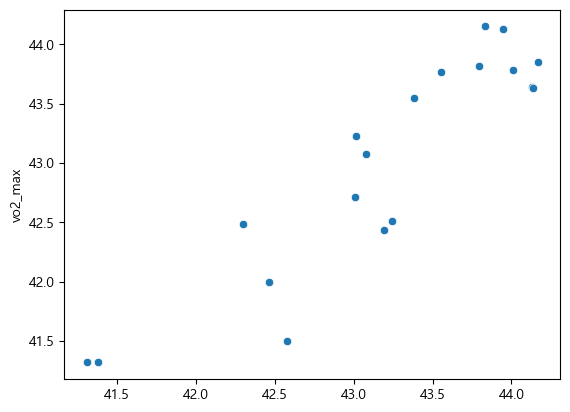

In [215]:
pred = grid_search.best_estimator_.predict(X_test)

sns.scatterplot(x=pred,y=y_test)

In [216]:
X = df_train_try.drop('vo2_max', axis=1)  # 설명 변수
y = df_train_try['vo2_max']  # 예측 변수

grid_search.best_estimator_.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [217]:
df_train_try.columns

Index(['distance', 'mean_speed', 'weight', 'muscle', 'body_fat', 'vo2_max'], dtype='object')

In [218]:
df_train_try.head(1)

distance  mean_speed  weight  muscle  body_fat  vo2_max
2985      3.08    6.795513    89.7    37.0      24.2    39.98

In [225]:
sejong = np.array([[3,5,81.7,38.3,13.8]])

In [226]:
grid_search.best_estimator_.predict(sejong)

array([43.83479], dtype=float32)

In [229]:
dict(zip(X.columns,grid_search.best_estimator_.feature_importances_))

{'distance': 0.030373173,
 'mean_speed': 0.11021463,
 'weight': 0.20126887,
 'muscle': 0.37521818,
 'body_fat': 0.28292513}

## 결론

- 유산소 운동의 수행능력은 역시 체중과 체지방의 음의 상관관계를 가지는 것으로 나타난다.
- 근육량의 경우는 양의 상관관계를 보여준다.
- 속도의 경우는 직접적인 운동수행능력과 관계있다고 판단했으나 분석결과는 그다지 상관관계가 없는 것으로 나타난다.
- 유산소 능력을 기르기 위해서는 결국 체중을 줄이고 근육량을 늘리는 것이 필요하다는 결과를 얻게되었다.
- 업무에도 필요한 체력을 기르기 위해 달리기에도 꾸준한 시간을 투자할 필요가 있다.